# O Problema

Imagine agora, que você vai atuar como Expert em Data Analytics em uma
empresa que exporta vinhos do Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos
relatórios iniciais a serem apresentados em uma reunião de investidores e
acionistas, explicando a quantidade de vinhos exportados e os fatores ex-
ternos que podem vir a surgir e que interferem nas análises:

1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as
seguintes informações:

* País de origem (Brasil).
* País de destino.
* Quantidade em litros de vinho exportado (utilize: 1KG = 1L).
* valor em US$

Seu objetivo é dizer o montante de venda de exportaçáo nos últimos 15 anos, separando análise por país e trazendo quais as prospecçóes futuras e possíveis ações para urna melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

> DICA:
> Para construir uma boa análise, utilize várias bases do mesmo site!
> Outro ponto interessante, é utilizar os dados externos citados acima para
> enriquecer ainda mais a mensagem que você quer passar.

> IMPORTANTE <br>
> Não esqueça de que este é entregável obrigatório!
> Se atente para o prazo de entrega até o final da fase!

# Bibliotecas

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import locale
import re
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Importação de Base da dados

In [ ]:
# Base de dados sem tratamento

# Produção
producao = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/producao/Producao.csv', sep=';',thousands='.', decimal=',')

#Exportação
expespumante = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpEspumantes.csv',sep=';',thousands='.', decimal=',')
expsuco = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpSuco.csv',sep=';',thousands='.', decimal=',')
expuva = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpUva.csv',sep=';',thousands='.', decimal=',')
expvinho = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpVinho.csv',sep=';',thousands='.', decimal=',')



# 1.Exportação

## 1.1 Exportação de Vinho de Mesa - Tratamento de dados

In [ ]:
expvinho.head(5)

,index,paises,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor,2020 Quantidade,2020 Valor,2021 Quantidade,2021 Valor,2022 Quantidade,2022 Valor
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Exportação de Espumante
expvinho.drop('index', axis = 1, inplace = True)
expvinho.set_index('paises', inplace=True)
expvinho.rename(index={'Alemanha, República Democrática': 'Alemanha'}, inplace=True)

In [ ]:
expvinho.head(5)

,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,1974 Valor,...,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor,2020 Quantidade,2020 Valor,2021 Quantidade,2021 Valor,2022 Quantidade,2022 Valor
paises,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
Alemanha,0,0,0,0,4168,2630,12000,8250,0,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,0,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 1.1.1 Filtro para pegar somente os Valores (US$)

In [ ]:
# Filtro para pegar somente os Valores (US$)
df_valor_expvinho = expvinho.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expvinho.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expvinho = df_valor_expvinho.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expvinho.head(2)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
paises,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,21,0,0


#### 1.1.2 Filtro de os Valores (US$) de 2007 a 2022

In [ ]:
# Selecionando colunas de 2007 a 2022
expvinho_filtro_valor = df_valor_expvinho.loc[:, '2007' :]

#### 1.1.3 Filtro para pegar somente as Quantidades (Kg)

In [ ]:
# Filtro para pegar somente as Quantidades (kg)
df_quantidade_expvinho = expvinho.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expvinho.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expvinho = df_quantidade_expvinho.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expvinho.head(2)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
paises,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26,4,0,0


#### 1.1.4 Filtro de Quantidades (kg) de 2007 a 2022

In [ ]:
# Selecionando colunas de 2007 a 2022
expsuco_filtro_quantidade = df_quantidade_expvinho.loc[:, '2007' :]

## 1.2 Gráfico de total de Valor de exportação de Vinho por ano (1970 - 2022)

In [ ]:
# Inverter a tabela, e criar 3 colunas
df_valor_expvinho_t = df_valor_expvinho.T

valor_expvinho = df_valor_expvinho_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_expvinho_t.columns)
valor_expvinho.columns = ["ano", "paises", "valor"]
valor_expvinho.head(2)

,ano,paises,valor
0,1970,Afeganistão,0
1,1971,Afeganistão,0


In [ ]:
# Calcular o total exportado por ano usando groupby
total_valor_expvinho_por_ano = valor_expvinho.groupby('ano')['valor'].sum().reset_index()

In [ ]:
total_valor_expvinho_por_ano.head(2)

,ano,valor
0,1970,40500
1,1971,83465


In [ ]:
total_valor_expvinho_por_ano.to_excel("/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/anos_todos..xlsx")

<ipython-input-14-cf623f338438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='ano', y='valor', data=total_valor_expvinho_por_ano, palette = cores_rgb_hex)
<ipython-input-14-cf623f338438>:6: UserWarning: 
The palette list has fewer values (1) than needed (53) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='ano', y='valor', data=total_valor_expvinho_por_ano, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

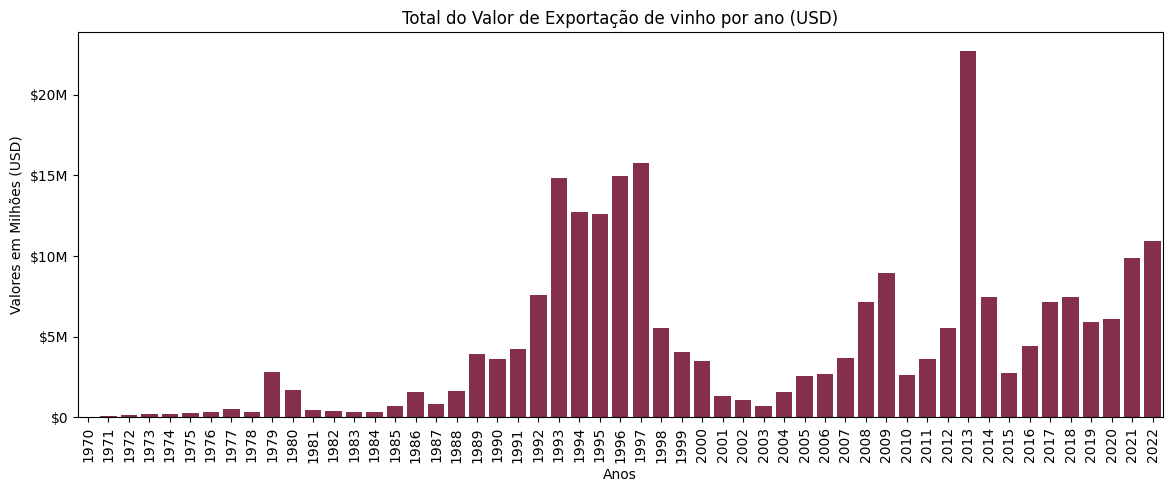

In [ ]:
plt.figure(figsize=(14,5))

# Definir cor rgb hex para grafico (palette)
cores_rgb_hex = ["#942145"]

axis = sns.barplot(x='ano', y='valor', data=total_valor_expvinho_por_ano, palette = cores_rgb_hex)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Ajuste no aixo x (anos) para 90 graus
plt.xticks(rotation=90)

# legendas
plt.xlabel('Anos')
plt.ylabel('Valores em Milhões (USD)')
plt.title('Total do Valor de Exportação de vinho por ano (USD)')
plt.grid(False)

plt.show

In [ ]:
# Validar valor de 2013
valor_total_2013 = total_valor_expvinho_por_ano.sort_values('valor', ascending=False)
valor_total_2013.head(1)

# 22.744,845

,ano,valor
43,2013,22744845


In [ ]:
# DataFrame:
data_porcentagem = pd.DataFrame(valor_total_2013)

# Calcular o total
total_exportacao = data_porcentagem['valor'].sum()

# Adicionar uma nova coluna com a porcentagem
data_porcentagem['porcentagem'] = (data_porcentagem['valor'] / total_exportacao) * 100

# Arredondar os valores na coluna 'porcentagem' para 2 casas decimais
data_porcentagem['porcentagem'] = data_porcentagem['porcentagem'].round(2)

# Exibir o DataFrame resultante
data_porcentagem.head(3)

,ano,valor,porcentagem
43,2013,22744845,9.39
27,1997,15793866,6.52
26,1996,14956324,6.17


In [ ]:
data_porcentagemfiltro = data_porcentagem[['ano','porcentagem']]

## 1.3 Gráfico de total de Quantidade de exportação de Vinho por ano (1970 - 2022)

In [ ]:
# Inverter a tabela, e criar 3 colunas
df_quantidade_expvinho_t = df_quantidade_expvinho.T

quantidade_expvinho = df_quantidade_expvinho_t.reset_index().melt(id_vars=["index"], value_vars=df_quantidade_expvinho_t.columns)
quantidade_expvinho.columns = ["ano", "paises", "quantidade"]
quantidade_expvinho.head(2)

,ano,paises,quantidade
0,1970,Afeganistão,0
1,1971,Afeganistão,0


In [ ]:
# Calcular o total exportado por ano usando groupby
total_qnt_expvinho_por_ano = quantidade_expvinho.groupby('ano')['quantidade'].sum().reset_index()

<ipython-input-123-97056d1af2e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='ano', y='quantidade', data=total_qnt_expvinho_por_ano, palette = cores_rgb_hex)
<ipython-input-123-97056d1af2e1>:4: UserWarning: 
The palette list has fewer values (1) than needed (53) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='ano', y='quantidade', data=total_qnt_expvinho_por_ano, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

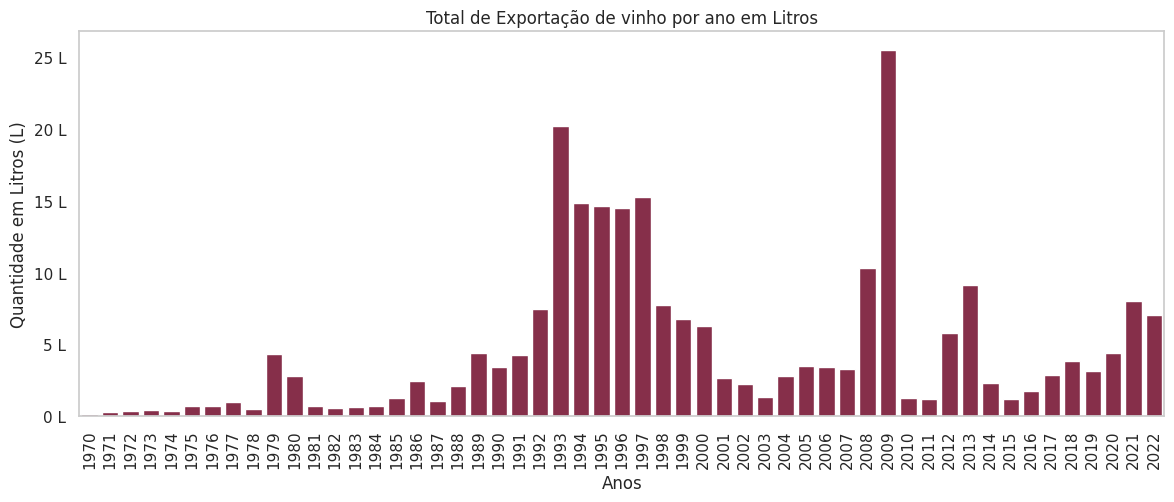

In [123]:
plt.figure(figsize=(14,5))

cores_rgb_hex = ["#942145"]
axis = sns.barplot(x='ano', y='quantidade', data=total_qnt_expvinho_por_ano, palette = cores_rgb_hex)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1e6:.0f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))

plt.xticks(rotation=90)
plt.xlabel('Anos')
plt.ylabel('Quantidade em Litros (L)')
plt.title('Total de Exportação de vinho por ano em Litros')
plt.grid(False)

plt.show

In [ ]:
# Validar valor de 2013
quantidade_total_2009 = total_qnt_expvinho_por_ano.sort_values('quantidade', ascending=False)
quantidade_total_2009.head(1)

# 25.514,198

,ano,quantidade
39,2009,25514198


In [ ]:
# DataFrame:
data_porcentagem_quantidade = pd.DataFrame(quantidade_total_2009)

# Calcular o total
total_exportacao_quantidade = data_porcentagem_quantidade['quantidade'].sum()

# Adicionar uma nova coluna com a porcentagem
data_porcentagem_quantidade['porcentagem'] = (data_porcentagem_quantidade['quantidade'] / total_exportacao_quantidade) * 100

# Arredondar os valores na coluna 'porcentagem' para 2 casas decimais
data_porcentagem_quantidade['porcentagem'] = data_porcentagem_quantidade['porcentagem'].round(2)

# Exibir o DataFrame resultante
data_porcentagem_quantidade.head(3)

,ano,quantidade,porcentagem
39,2009,25514198,10.27
23,1993,20213415,8.13
27,1997,15288335,6.15


## 1.4 Valor total de exportação de vinho por década (1970 - 2022)

In [ ]:
df_total_de_export_vinho_decada = pd.DataFrame(total_valor_expvinho_por_ano)

# Adicionando uma nova coluna 'Decada'
df_total_de_export_vinho_decada['Decada'] = (df_total_de_export_vinho_decada['ano'].astype(int) // 10) * 10

In [ ]:
# Agrupando por década e somando os valores de exportação
valor_total_exp_decada = df_total_de_export_vinho_decada.groupby('Decada')['valor'].sum().reset_index()
valor_total_exp_decada

,Decada,valor
0,1970,4761659
1,1980,11895357
2,1990,95961808
3,2000,33091927
4,2010,69709716
5,2020,26875512


<ipython-input-25-e3f9ac52ae02>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='Decada', y='valor', data=valor_total_exp_decada, palette = cores_rgb_hex, errorbar=None)
<ipython-input-25-e3f9ac52ae02>:4: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='Decada', y='valor', data=valor_total_exp_decada, palette = cores_rgb_hex, errorbar=None)


<function matplotlib.pyplot.show(close=None, block=None)>

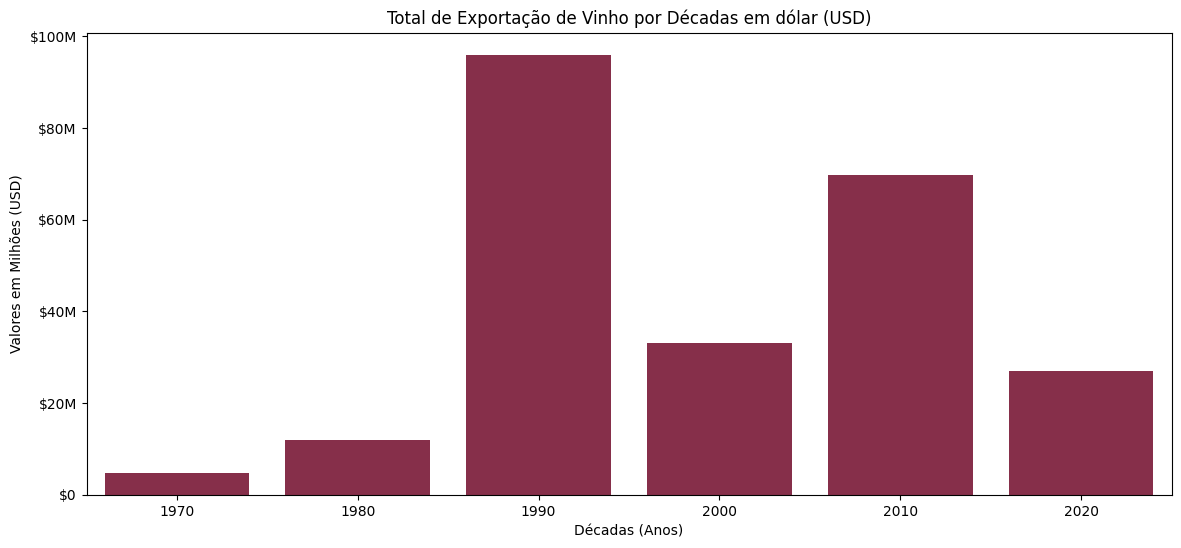

In [ ]:
plt.figure(figsize=(14,6))

cores_rgb_hex = ["#942145"]
axis = sns.barplot(x='Decada', y='valor', data=valor_total_exp_decada, palette = cores_rgb_hex, errorbar=None)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Décadas (Anos)')
plt.ylabel('Valores em Milhões (USD)')
plt.title('Total de Exportação de Vinho por Décadas em dólar (USD)')
plt.grid(False)

plt.show

## 1.5 Valor de quantidade de exportação de vinho por década (1970 - 2022)

In [ ]:
df_valor_quantidade_decada_t = df_quantidade_expvinho.T #dado sem o valor total

total_valor_quantidade_decada_por_ano = df_valor_quantidade_decada_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_quantidade_decada_t.columns)
total_valor_quantidade_decada_por_ano.columns = ["ano", "paises", "quantidade"]
total_valor_quantidade_decada_por_ano.head(2)

,ano,paises,quantidade
0,1970,Afeganistão,0
1,1971,Afeganistão,0


In [ ]:
total_exportacao_vinho_decada_quantidade = total_valor_quantidade_decada_por_ano.groupby('ano')['quantidade'].sum()

In [ ]:
# Exemplo de criação de DataFrames
df_decada_processo_quantidade = pd.DataFrame(total_exportacao_vinho_decada_quantidade)

# Lista de DataFrames
dataframes = [df_decada_processo_quantidade]

# Juntar os DataFrames pela coluna 'Países'
df_merged = pd.concat(dataframes).reset_index()

# Calcular a década
df_merged['Decada'] = (df_merged['ano'].astype(int) // 10) * 10

# Agrupar por Países e Década, somar os valores e resetar o índice
df_decada_quantidade_export_total = df_merged.groupby(['Decada'])['quantidade'].sum().reset_index()

# Exibir o DataFrame final
df_decada_quantidade_export_total

,Decada,quantidade
0,1970,8933400
1,1980,16881182
2,1990,109138613
3,2000,61463050
4,2010,32627507
5,2020,19494404


<ipython-input-29-f4c4eb61fe8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='Decada', y='quantidade', data=df_decada_quantidade_export_total, palette = cores_rgb_hex)
<ipython-input-29-f4c4eb61fe8b>:4: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='Decada', y='quantidade', data=df_decada_quantidade_export_total, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

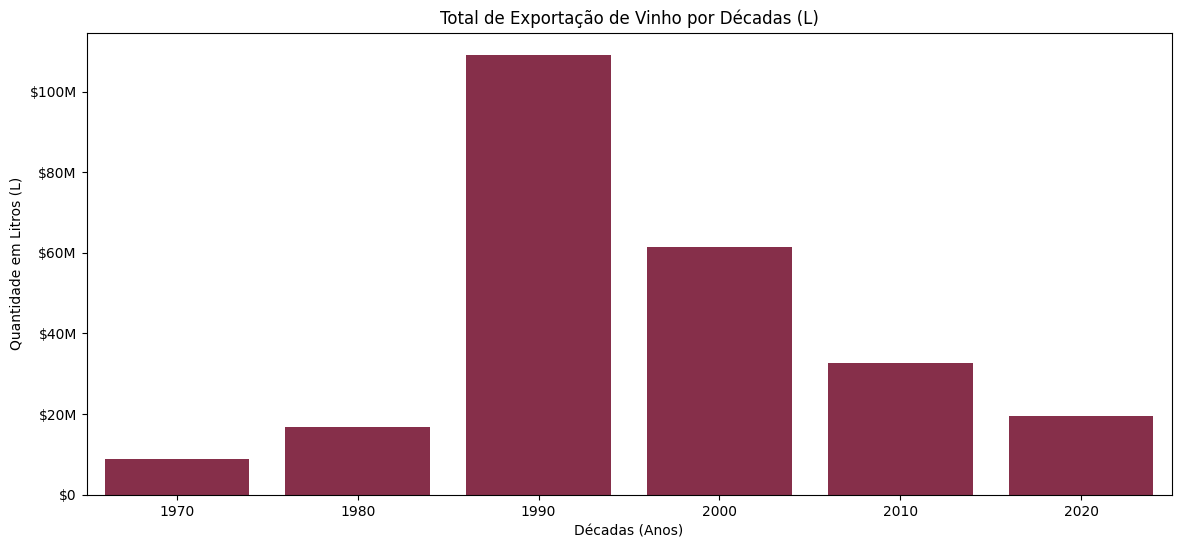

In [ ]:
plt.figure(figsize=(14,6))

cores_rgb_hex = ["#942145"]
axis = sns.barplot(x='Decada', y='quantidade', data=df_decada_quantidade_export_total, palette = cores_rgb_hex)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Décadas (Anos)')
plt.ylabel('Quantidade em Litros (L)')
plt.title('Total de Exportação de Vinho por Décadas (L)')
plt.grid(False)

plt.show

## 1.6 Total de valor por continente

In [ ]:
# Utilizar o dados do inicial - Com filtro de 2007 a 2022
continente_vinho_valor = pd.DataFrame(expvinho_filtro_valor) #df_valor_expvinho

In [ ]:
# Criar a coluna de Total a partir da soma dos valores
continente_vinho_valor['Total'] = continente_vinho_valor.sum(axis=1)

In [ ]:
# resetar o index
continente_vinho_valor.reset_index(inplace=True)

In [ ]:
# Selecionar as colunas paises e total
continente_vinho_valor_total = continente_vinho_valor.loc[:,['paises', 'Total']]

<ipython-input-34-18057dc7126f>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = barplot = sns.barplot(x='Continente', y='Total', data=df_continente, palette=cores_rgb_hex)
<ipython-input-34-18057dc7126f>:71: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = barplot = sns.barplot(x='Continente', y='Total', data=df_continente, palette=cores_rgb_hex)


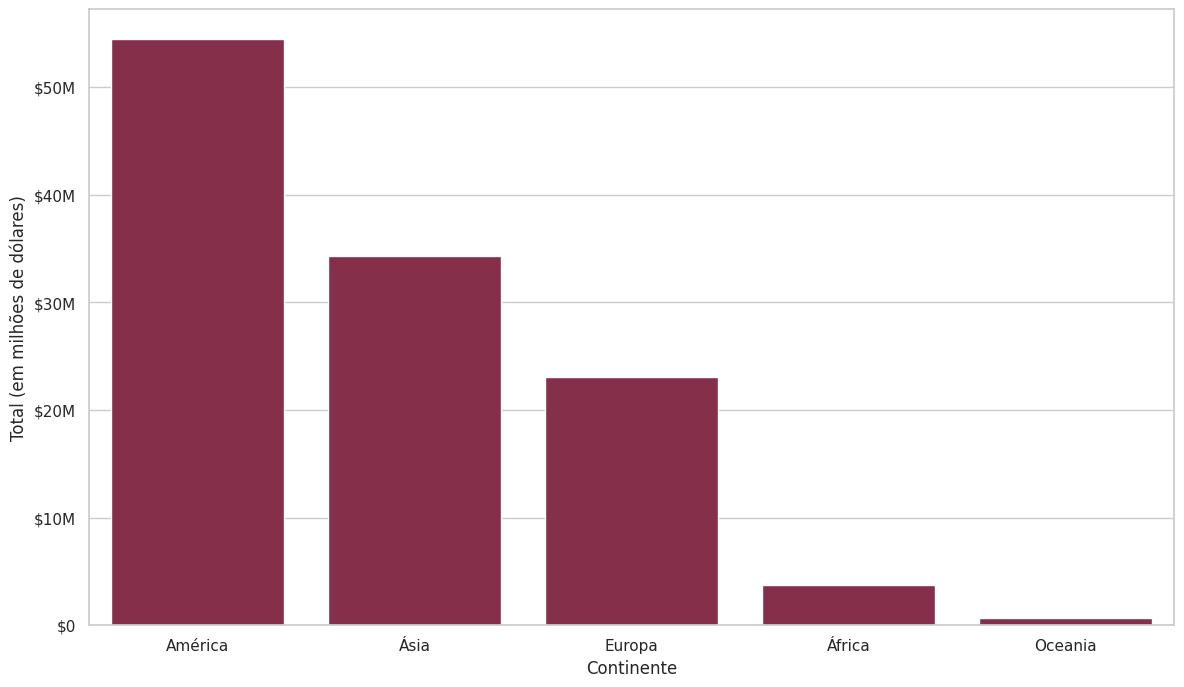

In [ ]:
# Criando o DataFrame
continente_valor_decada = pd.DataFrame(continente_vinho_valor_total)


# Gráfico de barras dividido por continente
# Dicionário para mapear continentes
continentes = {

    "África": ["África do Sul", "Angola", "Benin", "Cabo Verde", "Camarões", "Comores",
    "Congo", "Costa do Marfim", "Equador", "Gabão", "Gana", "Guine Bissau",
    "Guine Equatorial", "Haiti", "Ilhas Maurício", "Lesoto", "Libéria",
    "Madagascar", "Malawi", "Mali", "Marrocos", "Maurícia", "Moçambique",
    "Namíbia", "Nigéria", "Quênia", "República Centro-Africana",
    "República Democrática do Congo", "São Tomé e Príncipe", "Senegal",
    "Serra Leoa", "Suazilândia", "Tanzânia", "Togo", "Tunísia", "Mauritânia", "Namibia"],

    "América": ["Bahamas", "Canadá", "Cayman, Ilhas", "Costa Rica", "Cuba",
    "El Salvador", "Estados Unidos", "Guatemala", "Honduras", "Ilhas Virgens",
    "Jamaica", "México", "Nicarágua", "Panamá", "Porto Rico",
    "República Dominicana", "São Vicente e Granadinas",
    "Trinidade Tobago", "Turcas e Caicos, Ilhas", "Anguilla", "Antígua e Barbuda",
    "Antilhas Holandesas", "Barbados", "Belice", "Dominica", "Granada", "Nicaragua",
    "Argentina", "Bolívia", "Brasil", "Chile", "Colômbia", "Equador", "Guiana",
    "Guiana Francesa", "Paraguai", "Peru", "Suriname", "Uruguai", "Venezuela", "Aruba", "Curaçao"],

    # "América do Sul": ["Argentina", "Bolívia", "Brasil", "Chile", "Colômbia", "Equador", "Guiana",
    # "Guiana Francesa", "Paraguai", "Peru", "Suriname", "Uruguai", "Venezuela", "Aruba", "Curaçao"],

    "Ásia": ["Afeganistão", "Bangladesh", "China", "Hong Kong", "India", "Indonésia",
    "Irã", "Iraque", "Japão", "Jordânia", "Kuwait", "Líbano", "Malásia",
    "Omã", "Paquistão", "Qatar", "Singapura", "Tailândia", "Taiwan (FORMOSA)",
    "Turquia", "Vietnã","Coreia, Republica Sul", "Emirados Arabes Unidos", "Barein",
    "Catar", "Cingapura","Filipinas", "Rússia"],

    "Europa": ["Alemanha", "Áustria", "Bélgica", "Bulgária",
    "Croácia", "Dinamarca", "Eslovaca, Republica", "Espanha", "Estônia",
    "Finlândia", "França", "Gibraltar", "Grécia", "Hungria", "Irlanda",
    "Itália", "Letônia", "Luxemburgo", "Malta", "Países Baixos", "Polônia",
    "Portugal", "Reino Unido", "Tcheca, República", "Rússia", "Suécia", "Suíça",
    "Bósnia-Herzegovina", "Ilha de Man", "Chipre", "Montenegro", "Noruega"],

    "Oceania": ["Austrália", "Fiji", "Marshall, Ilhas", "Nova Caledônia", "Nova Zelândia",
    "Tuvalu", "Vanuatu","Cocos (Keeling), Ilhas"]

}


# Mapeando os continentes para cada país
def get_continente(pais):
    for continente, paises in continentes.items():
        if pais in paises:
            return continente
    return 'Outro'


# Adicionando uma coluna de continentes ao DataFrame
continente_valor_decada['Continente'] = continente_valor_decada['paises'].apply(get_continente)

# Agrupando por continente e somando os totais
df_continente = continente_valor_decada.groupby('Continente')['Total'].sum().reset_index()

# Ordenando por Total
df_continente = df_continente.sort_values(by='Total', ascending=False)

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
cores_rgb_hex = ["#942145"]
ax = barplot = sns.barplot(x='Continente', y='Total', data=df_continente, palette=cores_rgb_hex)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Adicionando rótulos e título
plt.xlabel('Continente')
plt.ylabel('Total (em milhões de dólares)')
# plt.title('Total por Continente')

ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Exibindo o gráfico
plt.show()

<ipython-input-35-195c08f34b30>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Continente', y='Porcentagem', data=df_continente, palette=cores_rgb_hex)
<ipython-input-35-195c08f34b30>:74: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Continente', y='Porcentagem', data=df_continente, palette=cores_rgb_hex)


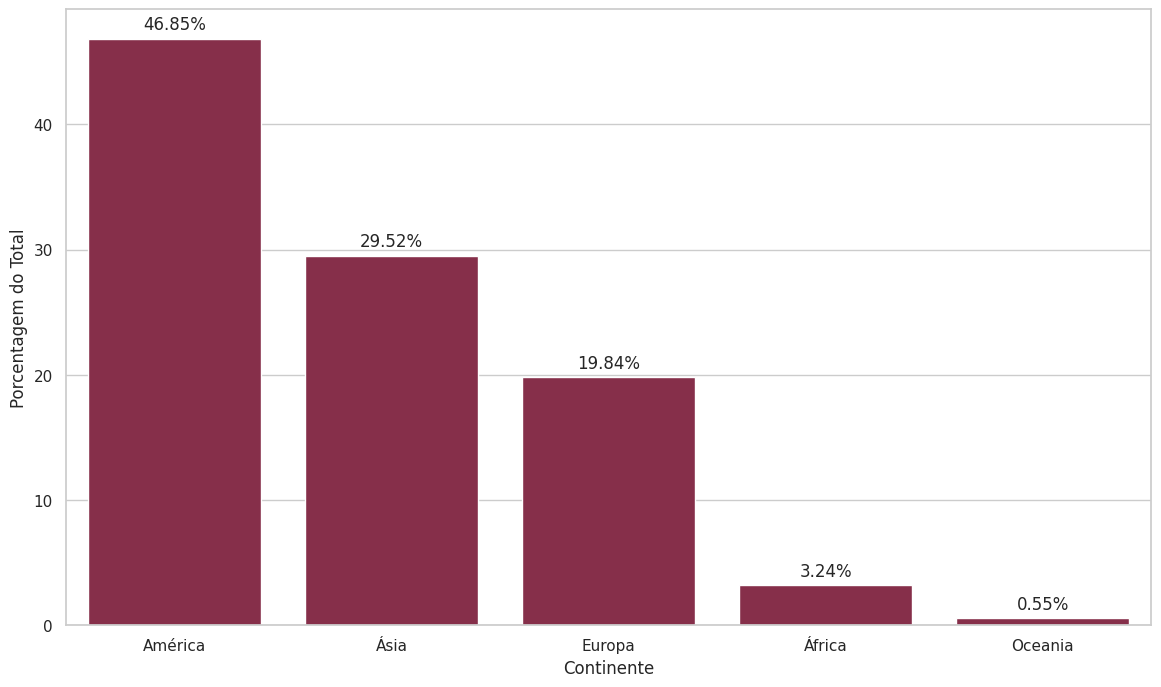

In [ ]:
# Criando o DataFrame
continente_valor_decada = pd.DataFrame(continente_vinho_valor_total)


# Gráfico de barras dividido por continente
# Dicionário para mapear continentes
continentes = {

    "África": ["África do Sul", "Angola", "Benin", "Cabo Verde", "Camarões", "Comores",
    "Congo", "Costa do Marfim", "Equador", "Gabão", "Gana", "Guine Bissau",
    "Guine Equatorial", "Haiti", "Ilhas Maurício", "Lesoto", "Libéria",
    "Madagascar", "Malawi", "Mali", "Marrocos", "Maurícia", "Moçambique",
    "Namíbia", "Nigéria", "Quênia", "República Centro-Africana",
    "República Democrática do Congo", "São Tomé e Príncipe", "Senegal",
    "Serra Leoa", "Suazilândia", "Tanzânia", "Togo", "Tunísia", "Mauritânia", "Namibia"],

    "América": ["Bahamas", "Canadá", "Cayman, Ilhas", "Costa Rica", "Cuba",
    "El Salvador", "Estados Unidos", "Guatemala", "Honduras", "Ilhas Virgens",
    "Jamaica", "México", "Nicarágua", "Panamá", "Porto Rico",
    "República Dominicana", "São Vicente e Granadinas",
    "Trinidade Tobago", "Turcas e Caicos, Ilhas", "Anguilla", "Antígua e Barbuda",
    "Antilhas Holandesas", "Barbados", "Belice", "Dominica", "Granada", "Nicaragua",
    "Argentina", "Bolívia", "Brasil", "Chile", "Colômbia", "Equador", "Guiana",
    "Guiana Francesa", "Paraguai", "Peru", "Suriname", "Uruguai", "Venezuela", "Aruba", "Curaçao"],

    # "América do Sul": ["Argentina", "Bolívia", "Brasil", "Chile", "Colômbia", "Equador", "Guiana",
    # "Guiana Francesa", "Paraguai", "Peru", "Suriname", "Uruguai", "Venezuela", "Aruba", "Curaçao"],

    "Ásia": ["Afeganistão", "Bangladesh", "China", "Hong Kong", "India", "Indonésia",
    "Irã", "Iraque", "Japão", "Jordânia", "Kuwait", "Líbano", "Malásia",
    "Omã", "Paquistão", "Qatar", "Singapura", "Tailândia", "Taiwan (FORMOSA)",
    "Turquia", "Vietnã","Coreia, Republica Sul", "Emirados Arabes Unidos", "Barein",
    "Catar", "Cingapura","Filipinas", "Rússia"],

    "Europa": ["Alemanha", "Áustria", "Bélgica", "Bulgária",
    "Croácia", "Dinamarca", "Eslovaca, Republica", "Espanha", "Estônia",
    "Finlândia", "França", "Gibraltar", "Grécia", "Hungria", "Irlanda",
    "Itália", "Letônia", "Luxemburgo", "Malta", "Países Baixos", "Polônia",
    "Portugal", "Reino Unido", "Tcheca, República", "Rússia", "Suécia", "Suíça",
    "Bósnia-Herzegovina", "Ilha de Man", "Chipre", "Montenegro", "Noruega"],

    "Oceania": ["Austrália", "Fiji", "Marshall, Ilhas", "Nova Caledônia", "Nova Zelândia",
    "Tuvalu", "Vanuatu","Cocos (Keeling), Ilhas"]

}


# Mapeando os continentes para cada país
def get_continente(pais):
    for continente, paises in continentes.items():
        if pais in paises:
            return continente
    return 'Outro'


# Adicionando uma coluna de continentes ao DataFrame
continente_valor_decada['Continente'] = continente_valor_decada['paises'].apply(get_continente)

# Agrupando por continente e somando os totais
df_continente = continente_valor_decada.groupby('Continente')['Total'].sum().reset_index()

# Ordenando por Total
df_continente = df_continente.sort_values(by='Total', ascending=False)

# Calculando a porcentagem em relação ao total
df_continente['Porcentagem'] = df_continente['Total'] / df_continente['Total'].sum() * 100

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
cores_rgb_hex = ["#942145"]
ax = sns.barplot(x='Continente', y='Porcentagem', data=df_continente, palette=cores_rgb_hex)

# Adicionando rótulos e título
plt.xlabel('Continente')
plt.ylabel('Porcentagem do Total')
# plt.title('Porcentagem do Total por Continente')

# Adicionando rótulos no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Exibindo o gráfico
plt.show()

In [ ]:
df_continente

,Continente,Total,Porcentagem
0,América,54501680,46.850736
4,Ásia,34339883,29.519252
1,Europa,23078403,19.838658
3,África,3766143,3.237452
2,Oceania,644357,0.553902


In [ ]:
# continente_vinho_valor_total.to_excel('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/continentes.xlsx')

# 2.Top Paises em expostação

## 2.1 Dez pais com maior valor de exportação por pais (2007 - 2022)

In [ ]:
# Utilizar o dados do inicial - Com filtro de 2007 a 2022
vinho_total_valor = pd.DataFrame(expvinho_filtro_valor) #df_valor_expvinho

In [ ]:
# Criar a coluna de Total a partir da soma dos valores
# vinho_total_valor['Total'] = vinho_total_valor.sum(axis=1)

In [ ]:
# resetar o index
vinho_total_valor.reset_index(inplace=True)

In [ ]:
# Selecionar as colunas paises e total
vinho_total_valor_columns = vinho_total_valor.loc[:,['paises', 'Total']]

In [ ]:
#Ordernar por total de forma crescente
export_paises_valor_total = vinho_total_valor_columns.sort_values('Total', ascending=False)

In [ ]:
# Selecionar 10 primeira linhas
top_valor_exportado = export_paises_valor_total.head(10)

<ipython-input-44-9f2921475ab7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='paises', y='Total', data=top_valor_exportado, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

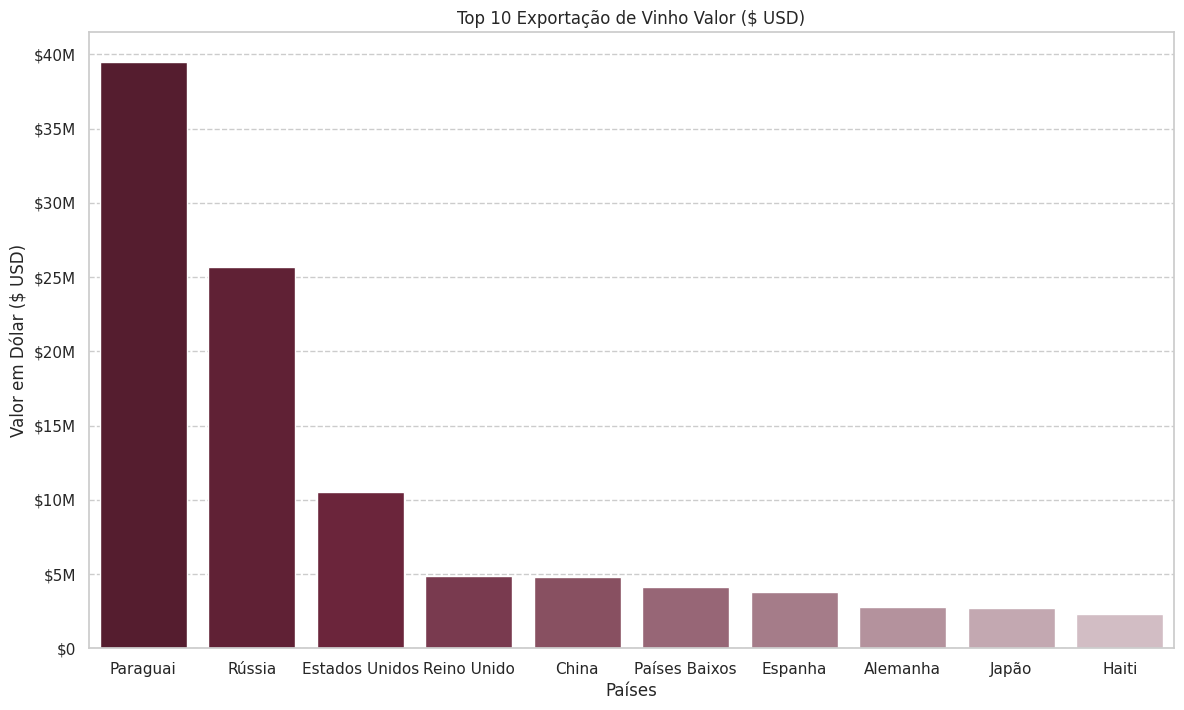

In [ ]:
plt.figure(figsize=(14,8))
cores_rgb_hex = ["#5e142c", "#6a1731", "#761a37", "#83304b", "#91475e","#9f5e73", "#ac7587", "#ba8c9b", "#c8a3af", "#d5bac3"]
axis = sns.barplot(x='paises', y='Total', data=top_valor_exportado, palette = cores_rgb_hex)

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# plt.xticks(rotation = 30)
plt.ylabel('Valor em Dólar ($ USD)')
plt.xlabel('Países')
plt.title('Top 10 Exportação de Vinho Valor ($ USD)')
plt.grid(linestyle="--", axis = "y")
plt.show


In [ ]:
# Validar total de valor do Paraguai
top_valor_exportado.head(1)

# 39.520,550

,paises,Total
97,Paraguai,39520550


## 2.2 Dez pais com maior quantidade de exportação por pais (2007 - 2022)




In [ ]:
# Utilizar o dados do inicial - Com filtro de 2007 a 2023
vinho_total_quantidade = pd.DataFrame(expsuco_filtro_quantidade)

In [ ]:
# Criar a coluna de Total a partir da soma das quantidade
vinho_total_quantidade['Total'] = vinho_total_quantidade.sum(axis=1)

In [ ]:
# resetar o index
vinho_total_quantidade.reset_index(inplace=True)

In [ ]:
# Selecionar as colunas paises e total
vinho_total_quantidade_columns = vinho_total_quantidade.loc[:,['paises', 'Total']]

In [ ]:
#Ordernar por total de forma crescente
order_paises_quantidade_total = vinho_total_quantidade_columns.sort_values('Total', ascending=False)

In [ ]:
# Selecionar 10 primeira linhas
top_quantidade_exportado = order_paises_quantidade_total.head(10)

<ipython-input-52-d582afbd356c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='paises', y='Total', data=top_quantidade_exportado, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

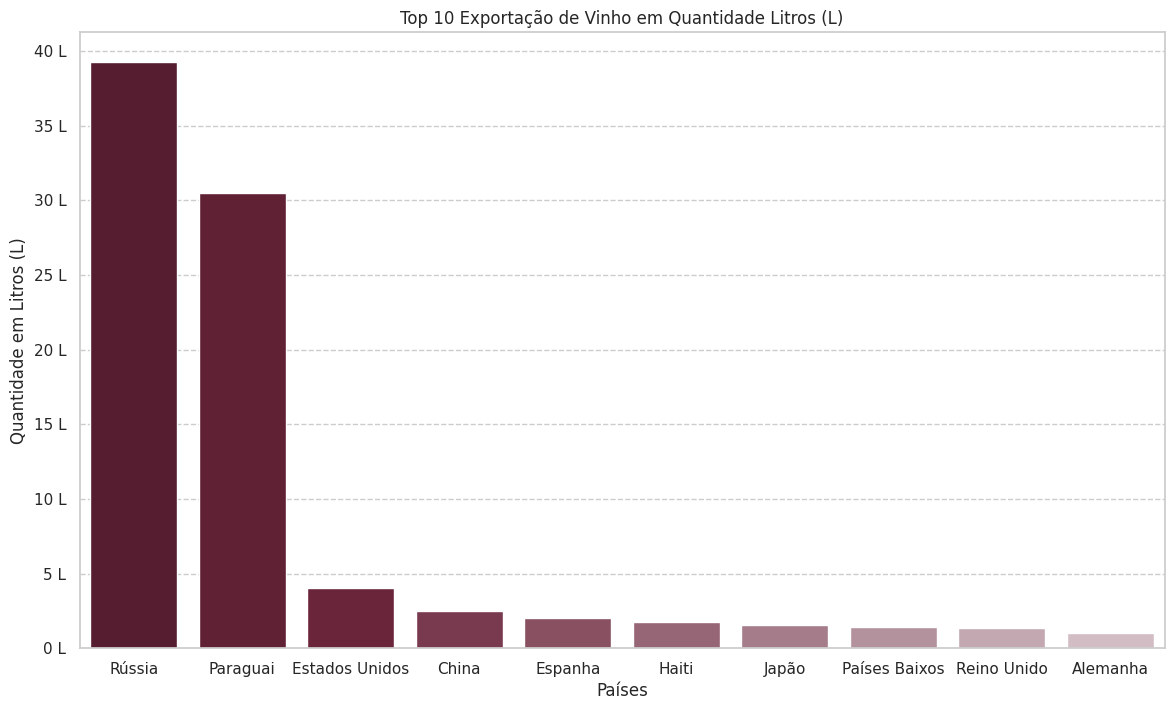

In [ ]:
plt.figure(figsize=(14,8))
cores_rgb_hex = ["#5e142c", "#6a1731", "#761a37", "#83304b", "#91475e","#9f5e73", "#ac7587", "#ba8c9b", "#c8a3af", "#d5bac3"]
axis = sns.barplot(x='paises', y='Total', data=top_quantidade_exportado, palette = cores_rgb_hex)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1e6:.0f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))

plt.ylabel('Quantidade em Litros (L)')
plt.xlabel('Países')
plt.title('Top 10 Exportação de Vinho em Quantidade Litros (L)')
plt.grid(linestyle="--", axis = "y")
plt.show

### 2.2.1 Comparação de Quantidade e Valor por País (2007 - 2022)

In [ ]:
df_quantidade = pd.DataFrame(top_quantidade_exportado)
df_valor = pd.DataFrame(top_valor_exportado)

# Juntar os DataFrames pela coluna 'paises'
df_comparacao_pais = pd.merge(df_quantidade, df_valor, on='paises', how='inner')

# Renomear as colunas conforme necessário
df_comparacao_pais = df_comparacao_pais.rename(columns={'Total_x': 'Quantidade', 'Total_y': 'Valor'})

# Exibir o DataFrame final
df_comparacao_pais.head(5)

,paises,Quantidade,Valor
0,Rússia,39296199,25677644
1,Paraguai,30500229,39520550
2,Estados Unidos,4042624,10494605
3,China,2517096,4776915
4,Espanha,1993000,3808552


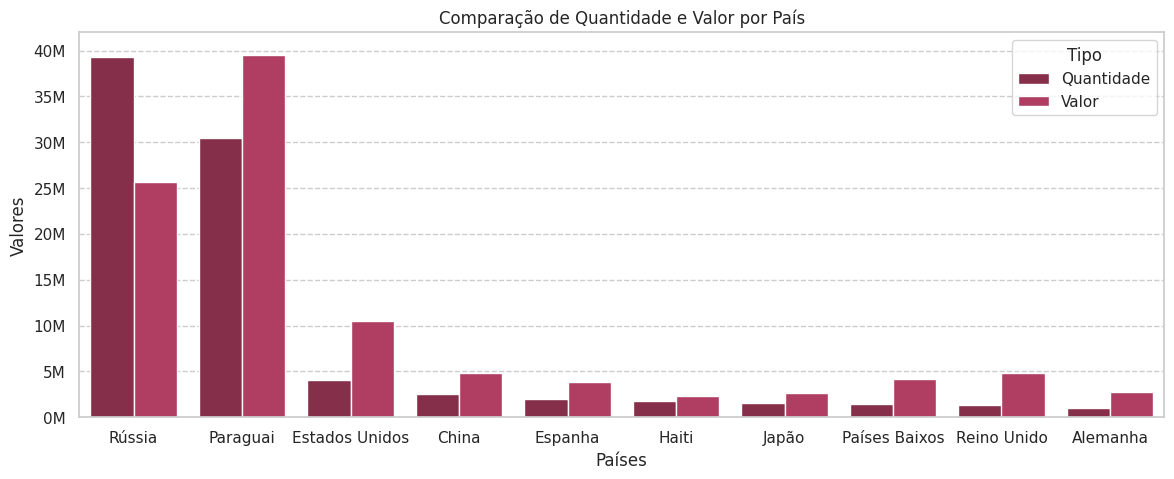

In [146]:
novo_df_comparacao_pais = pd.DataFrame(df_comparacao_pais)

# Reorganizando os dados para ter uma coluna 'Tipo' indicando se é 'Quantidade' ou 'Valor'
df_melted = pd.melt(novo_df_comparacao_pais, id_vars=['paises'], var_name='Tipo', value_name='Total')

# Criando um gráfico de barras lado a lado com seaborn
plt.figure(figsize=(14, 5))
cores_rgb_hex = ["#942145","#C22B5B"]
ax = sns.barplot(x='paises', y='Total', hue='Tipo', data = df_melted, palette = cores_rgb_hex)

# Adicionando rótulos e legendas ao gráfico
plt.xlabel('Países')
plt.ylabel('Valores')
plt.title('Comparação de Quantidade e Valor por País')
plt.grid(linestyle="--", axis = "y")
plt.ylim(0,42000000)

# Formatando os números do eixo y em milhões
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Exibindo o gráfico
plt.show()

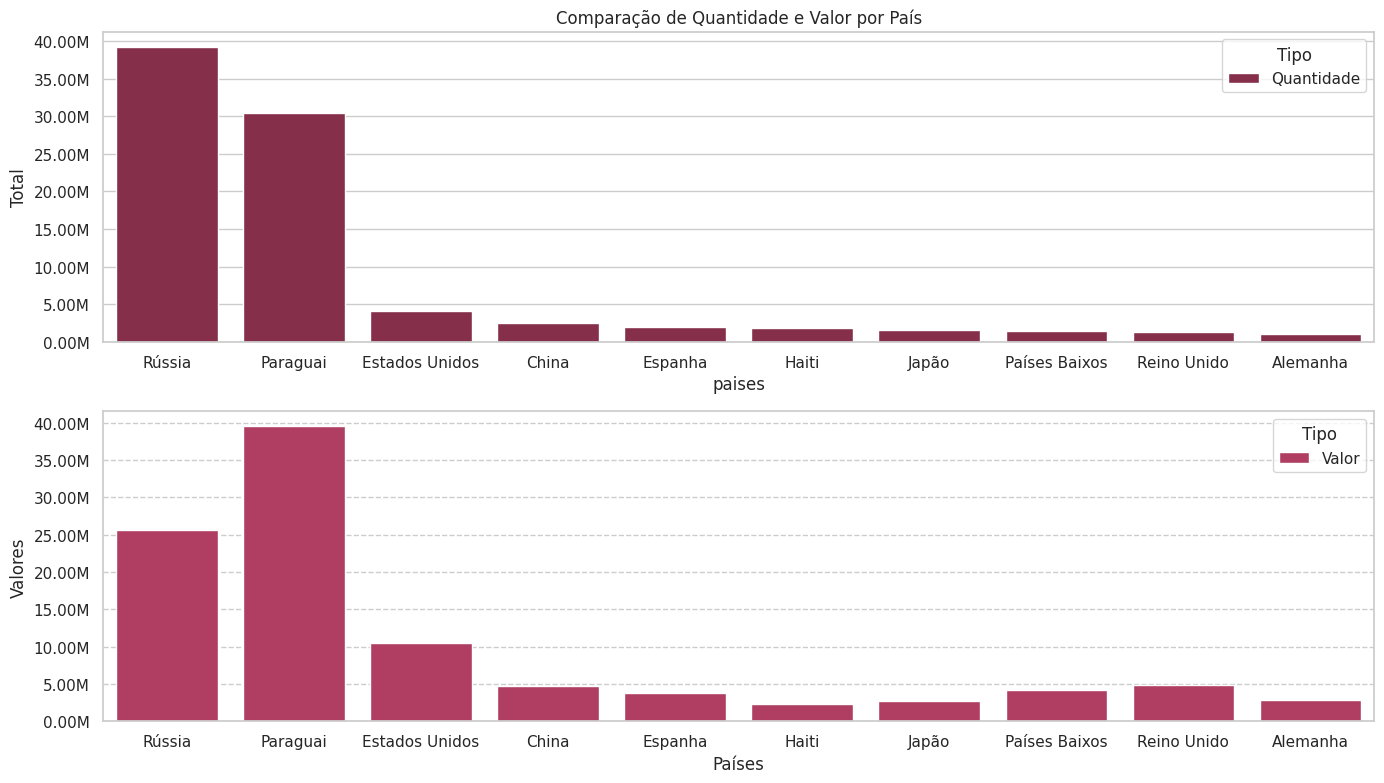

In [ ]:
# Reorganizando os dados para ter uma coluna 'Tipo' indicando se é 'Quantidade' ou 'Valor'
df_melted = pd.melt(df_comparacao_pais, id_vars=['paises'], var_name='Tipo', value_name='Total')

# Criando um gráfico de barras lado a lado com seaborn
plt.figure(figsize=(14, 8))

# Subplot 1 - Barra de Quantidade
plt.subplot(211)
ax1 = sns.barplot(x='paises', y='Total', hue='Tipo', data=df_melted[df_melted['Tipo'] == 'Quantidade'], palette=['#942145'])
plt.title('Comparação de Quantidade e Valor por País')

# Subplot 2 - Barra de Valor
plt.subplot(212)
ax2 = sns.barplot(x='paises', y='Total', hue='Tipo', data=df_melted[df_melted['Tipo'] == 'Valor'], palette=['#C22B5B'])

# Adicionando rótulos e legendas ao gráfico
plt.xlabel('Países')
plt.ylabel('Valores')
plt.grid(linestyle="--", axis="y")

# Formatando os números do eixo y em milhões
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.2f}M'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.2f}M'))

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## 2.4 Timeline dos 3 paises com maior valor em exportação (USD) (2007 - 2022)

In [ ]:
vinho_total_valor.head(2)

,index,paises,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46
1,1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116


In [ ]:
# Ordernar por total e selecionar os 3 primeiros
order_top_paises_valor_total = vinho_total_valor.sort_values('Total', ascending=False).head(3)

In [ ]:
# Transformando a coluna 'pais' em índice (index)
order_top_paises_valor_total.set_index('paises', inplace=True)

In [ ]:
# Drop coluna total
order_top_paises_valor_total.drop('Total', axis = 1, inplace = True)

In [ ]:
# Inverter data frame e criar uma tabela com 3 colunas
order_top_paises_valor_total_t = order_top_paises_valor_total.T
order_top_paises_valor_total_novo = order_top_paises_valor_total_t.reset_index().melt(id_vars=["index"], value_vars=order_top_paises_valor_total_t.columns)
order_top_paises_valor_total_novo.columns = ["ano", "pais", "total"]
order_top_paises_valor_total_novo.head(5)

,ano,pais,total
0,index,Paraguai,97
1,2007,Paraguai,801519
2,2008,Paraguai,1374088
3,2009,Paraguai,392087
4,2010,Paraguai,449197


<function matplotlib.pyplot.show(close=None, block=None)>

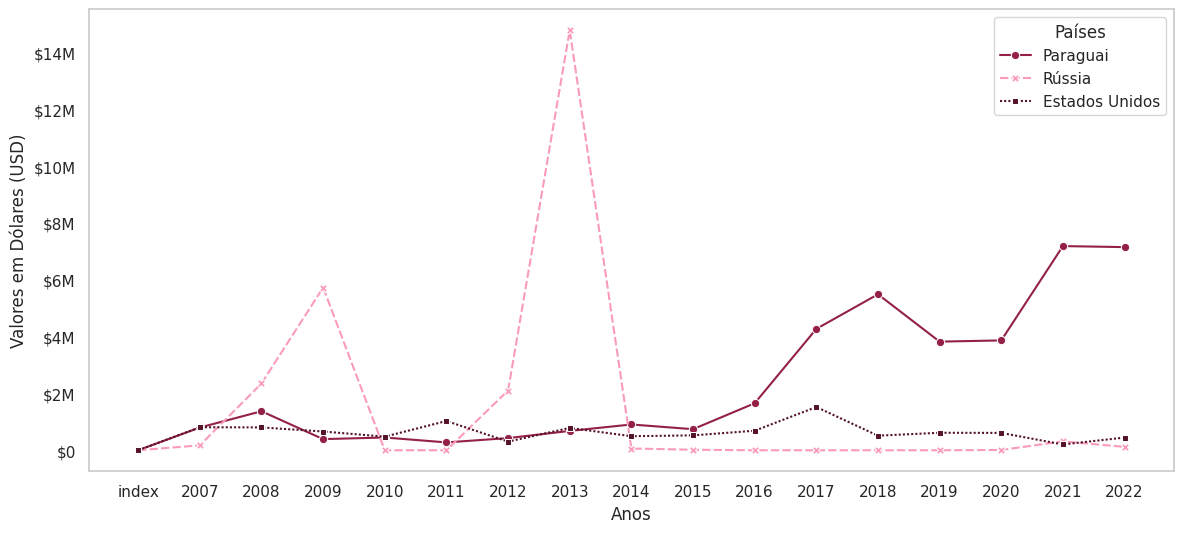

In [ ]:
plt.figure(figsize=(14,6))
#palettes = sns.color_palette("Paired")

cores_rgb_hex = ["#942145", "#FA9BB9", "#551328"]
# Seaborn lineplot
axis = sns.lineplot(data=order_top_paises_valor_total_novo, x="ano", y="total", hue="pais", style="pais", markers=True, dashes=True, palette=cores_rgb_hex)
#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{valor/1000:.1f}'))

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Anos')
plt.ylabel('Valores em Dólares (USD)')
# plt.title(' Top 3 paises com maior valor em exportação (USD)')
plt.grid(False)

# Personalizar a legenda (nome apresentado para o hue)
legenda = plt.legend(title='Países')

plt.show

### 2.4.1 Comparação da timeline dos 3 maiores paises de exportação em valor (2007 - 2022)

In [ ]:
# Filtrar Paraguai ano de 2022
paraguai_valor_export = order_top_paises_valor_total_novo[order_top_paises_valor_total_novo["pais"] == "Paraguai"]

In [ ]:
# Filtrar Rússia do ano de 2022
russia_valor_export = order_top_paises_valor_total_novo[order_top_paises_valor_total_novo["pais"] == "Rússia"]

In [ ]:
# Filtrar Estados Unidos do ano de 2022
usa_valor_export = order_top_paises_valor_total_novo[order_top_paises_valor_total_novo["pais"] == "Estados Unidos"]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x500 with 0 Axes>

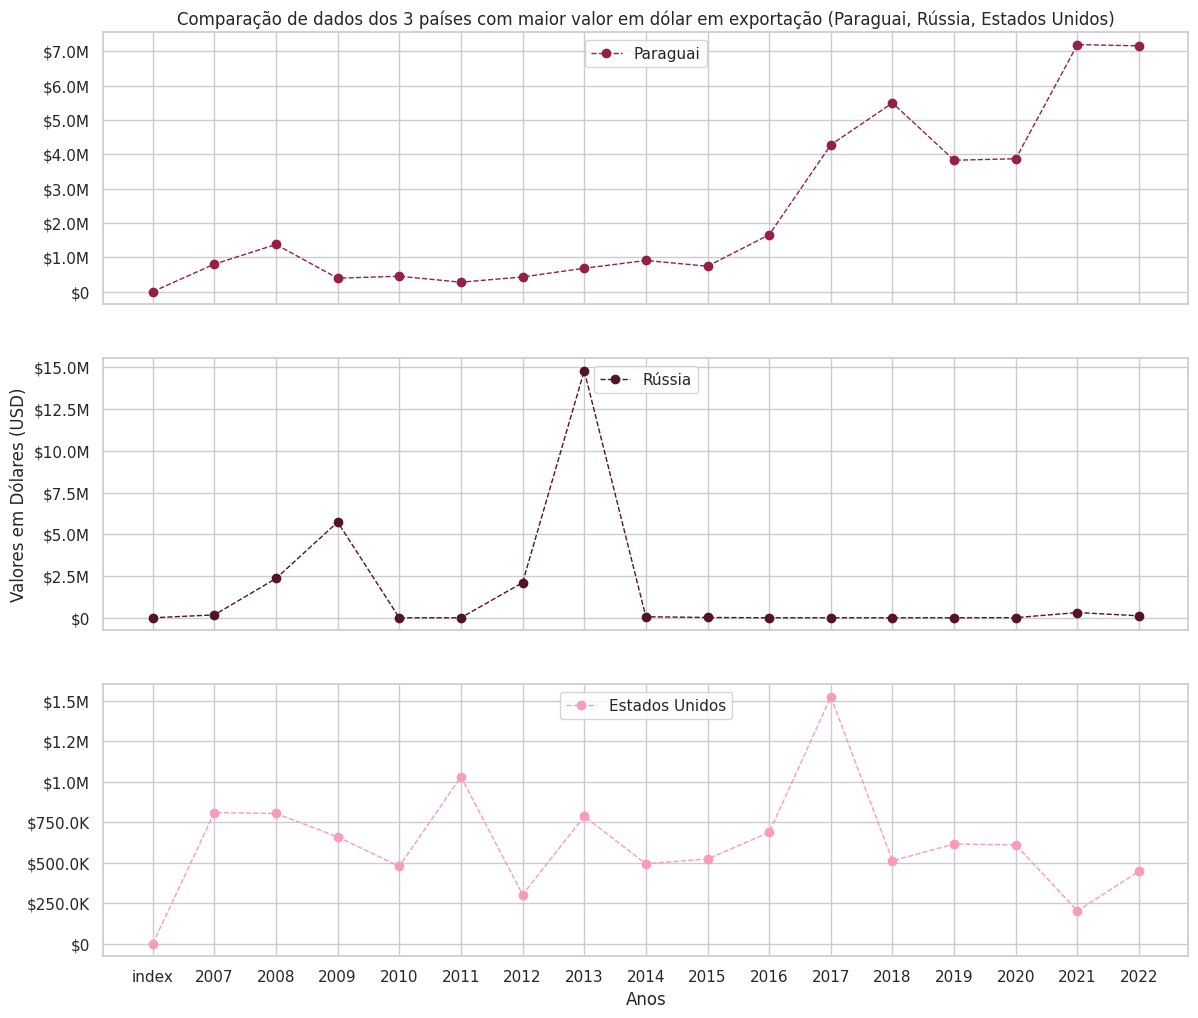

In [ ]:
plt.figure(figsize=(14,5))
#palettes = sns.color_palette("Paired")

axis = pd.DataFrame(data=paraguai_valor_export)
axis1 = pd.DataFrame(data=russia_valor_export)
axis2 = pd.DataFrame(data=usa_valor_export)

#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{valor/1000:.1f}'))

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.1f}K'
    else:
        return f'${value:.0f}'

# Gráfico para a primeira linha do DataFrame
axs[0].plot(axis['ano'], axis['total'], label='Paraguai', color='#942145', marker='o', linestyle='--', linewidth=1)
# axs[0].set_ylabel('Valores em Dólares (USD)')
axs[0].set_title('Comparação de dados dos 3 países com maior valor em dólar em exportação (Paraguai, Rússia, Estados Unidos)')
# axs[0].grid(linestyle="--", axis = "y")

# Gráfico para a segunda linha do DataFrame
axs[1].plot(axis1['ano'], axis1['total'], label='Rússia', color='#551328', marker='o', linestyle='--', linewidth=1)
axs[1].set_ylabel('Valores em Dólares (USD)')
axs[1].grid(linestyle="-", axis = "y")
# Gráfico para a terceira linha do DataFrame
axs[2].plot(axis2['ano'], axis2['total'], label='Estados Unidos', color='#FA9BB9', marker='o', linestyle='--', linewidth=1)
axs[2].set_xlabel('Anos')
# axs[2].set_ylabel('Valores em Dólares (USD)')
axs[2].grid(linestyle="-", axis = "y")

# Aplicar o formatador à escala do eixo y
for ax in axs:
    ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Adicionar legenda
axs[0].legend(loc='upper center')
axs[1].legend(loc='upper center')
axs[2].legend(loc='upper center')

plt.show

In [ ]:
# Mover o arquivo para o Google Drive
#df_final_tabela.to_excel('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/top_exportado_paises.xlsx', index=False)

## 2.5 Top 3 paises com maior quantidade em expostação por litro (L)

In [ ]:
order_top_paises_quantidade_total = expsuco_filtro_quantidade.sort_values('Total', ascending=False).head(3)

In [ ]:
# Transformando a coluna 'pais' em índice (index)
order_top_paises_quantidade_total.set_index('paises', inplace=True)

In [ ]:
order_top_paises_quantidade_total.drop('Total', axis = 1, inplace = True)

In [ ]:
order_top_paises_quantidade_total_t = order_top_paises_quantidade_total.T
order_top_paises_quantidade_total_novo = order_top_paises_quantidade_total_t.reset_index().melt(id_vars=["index"], value_vars=order_top_paises_quantidade_total_t.columns)
order_top_paises_quantidade_total_novo.columns = ["ano", "pais", "quantidade"]
order_top_paises_quantidade_total_novo.head(5)

,ano,pais,quantidade
0,2007,Rússia,266400
1,2008,Rússia,6207658
2,2009,Rússia,21912914
3,2010,Rússia,0
4,2011,Rússia,0


<function matplotlib.pyplot.show(close=None, block=None)>

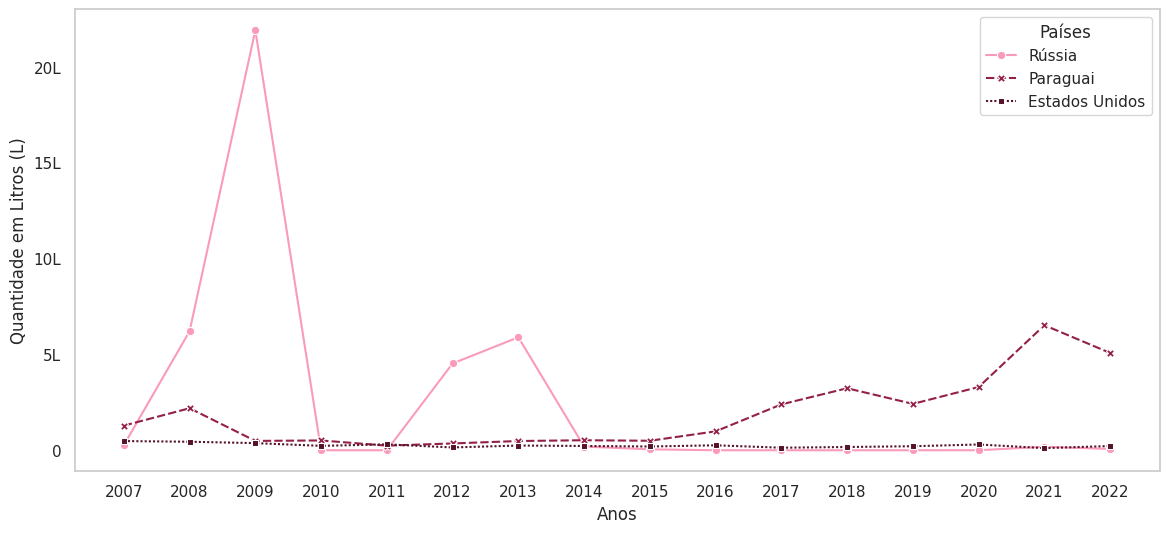

In [ ]:
plt.figure(figsize=(14,6))
#palettes = sns.color_palette("Paired")

cores_rgb_hex = ["#FA9BB9", "#942145", "#551328"]
# Seaborn lineplot
axis = sns.lineplot(data=order_top_paises_quantidade_total_novo, x="ano", y="quantidade", hue="pais", style="pais", markers=True, dashes=True, palette=cores_rgb_hex)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}L'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Anos')
plt.ylabel('Quantidade em Litros (L)')
# plt.title(' Top 3 países com maior quantidade em exportação por litro (L)')
#plt.grid(linestyle="--", axis = "y")
plt.grid(False)

# Personalizar a legenda (nome apresentado para o hue)
legenda = plt.legend(title='Países')

plt.show

### 2.5.1 Comparação da timeline dos 3 maiores paises de exportação em valor (2007 - 2022)

In [ ]:
# Filtrar Rússia do ano de 2022
russia_quantidade_export = order_top_paises_quantidade_total_novo[order_top_paises_quantidade_total_novo["pais"] == "Rússia"]

In [ ]:
# Filtrar Paraguai do ano de 2022
paraguai_quantidade_export = order_top_paises_quantidade_total_novo[order_top_paises_quantidade_total_novo["pais"] == "Paraguai"]

In [ ]:
# Filtrar Estados Unidos do ano de 2022
usa_quantidade_export = order_top_paises_quantidade_total_novo[order_top_paises_quantidade_total_novo["pais"] == "Estados Unidos"]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x500 with 0 Axes>

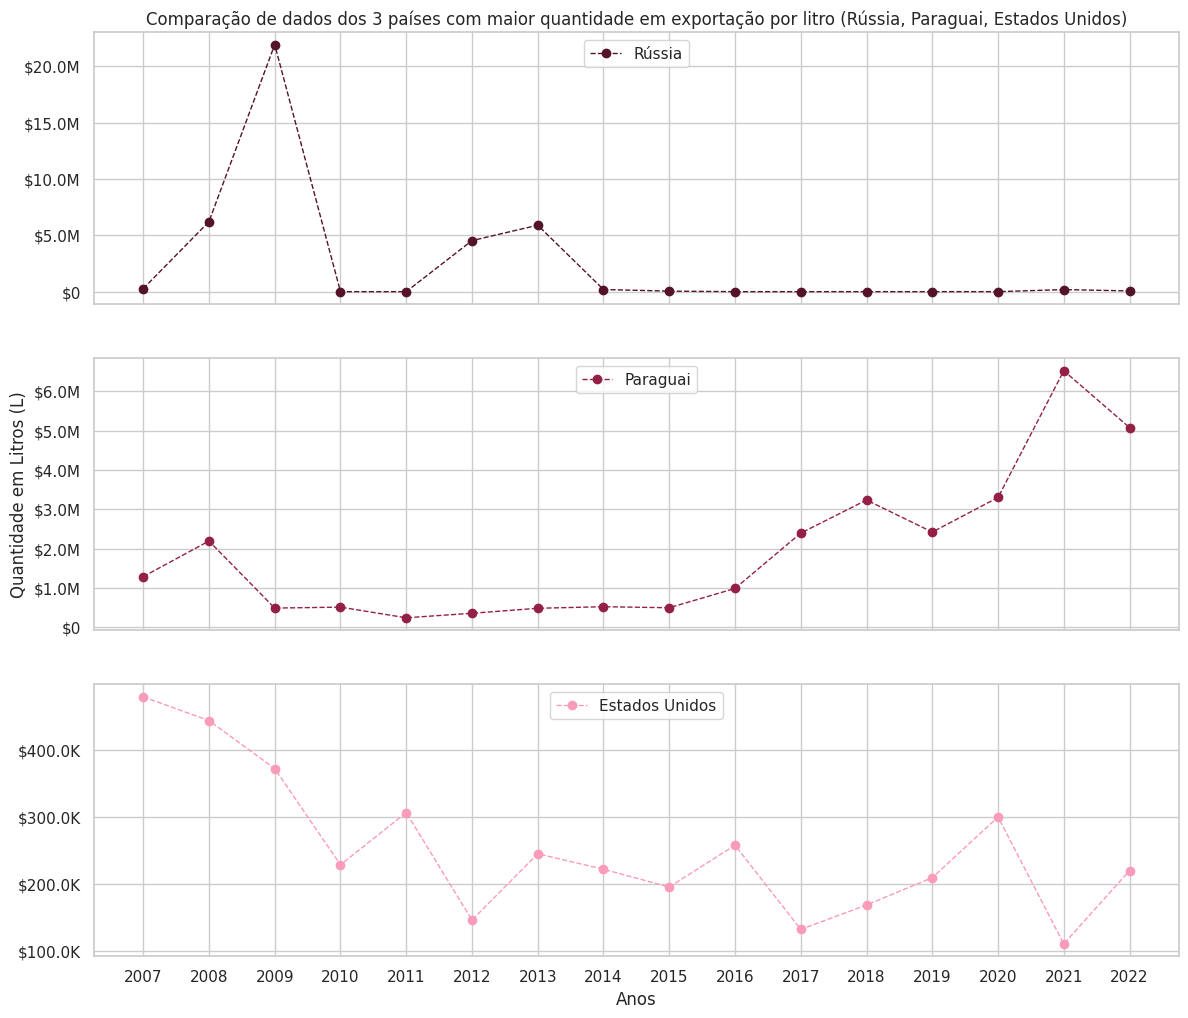

In [ ]:
plt.figure(figsize=(14,5))
#palettes = sns.color_palette("Paired")

axis = pd.DataFrame(russia_quantidade_export)
axis1 = pd.DataFrame(paraguai_quantidade_export)
axis2 = pd.DataFrame(usa_quantidade_export)

#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{valor/1000:.1f}'))

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Função para formatar os valores do eixo y em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e9:
        return f'${value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'${value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'${value / 1e3:.1f}K'
    else:
        return f'${value:.0f}'

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1e6:.0f} L"  # Dividindo por 1000 para converter para mil litros


# Gráfico para a primeira linha do DataFrame
axs[0].plot(axis['ano'], axis['quantidade'], label='Rússia', color='#551328', marker='o', linestyle='--', linewidth=1)
# axs[0].set_ylabel('Quantidade em Litros (L)')
axs[0].set_title('Comparação de dados dos 3 países com maior quantidade em exportação por litro (Rússia, Paraguai, Estados Unidos)')
axs[0].grid(linestyle="-", axis = "y")

# Gráfico para a segunda linha do DataFrame
axs[1].plot(axis1['ano'], axis1['quantidade'], label='Paraguai', color='#942145', marker='o', linestyle='--', linewidth=1)
axs[1].set_ylabel('Quantidade em Litros (L)')
axs[1].grid(linestyle="-", axis = "y")
# Gráfico para a terceira linha do DataFrame
axs[2].plot(axis2['ano'], axis2['quantidade'], label='Estados Unidos', color='#FA9BB9', marker='o', linestyle='--', linewidth=1)
axs[2].set_xlabel('Anos')
# axs[2].set_ylabel('Quantidade em Litros (L)')
axs[2].grid(linestyle="-", axis = "y")

# Aplicar o formatador à escala do eixo y
for ax in axs:
    ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Adicionar legenda
axs[0].legend(loc='upper center')
axs[1].legend(loc='upper center')
axs[2].legend(loc='upper center')

plt.show

#  3.As 15 maiores economias do mundo

## 3.1 PIB a preços correntes, em bilhões de US$, 2012-2022

In [ ]:
# Maiores economias do mundo: PIB a preços correntes, em bilhões de US$, 2012-2022
# https://www.gov.br/funag/pt-br/ipri/publicacoes/estatisticas/as-15-maiores-economias-do-mundo
economia_mundo = pd.read_csv("/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/economias_do_mundo/Maiores_economias_do mundo_em bilhoes_2012-2022.csv" , sep=';',decimal=',')
economia_mundo.head(2)

,País,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Estados Unidos,16155.250,16691.500,17393.100,18036.650,18569.100,19417.144,20351.771,21239.303,22063.044,22886.238,23760.331
1,China,8570.348,9635.025,10534.526,11226.186,11218.281,11795.297,12796.752,13862.968,15066.667,16340.866,17706.631


In [ ]:
#Ajuste do nome País para pais
economia_mundo.rename(columns={"País": "pais"}, inplace=True)

# Transformando a coluna 'pais' em índice (index)
economia_mundo.set_index('pais', inplace=True)

In [ ]:
economia_mundo_t = economia_mundo.T
economia_mundo_novo = economia_mundo_t.reset_index().melt(id_vars=["index"], value_vars=economia_mundo_t.columns)
economia_mundo_novo.columns = ["ano", "pais", "tota_por_ano"]
economia_mundo_novo.head(5)

,ano,pais,tota_por_ano
0,2012,Estados Unidos,16155.25
1,2013,Estados Unidos,16691.50
2,2014,Estados Unidos,17393.10
3,2015,Estados Unidos,18036.65
4,2016,Estados Unidos,18569.10


In [ ]:
# Filtrar pela linhas do ano de 2022

economia_mundo_2022 = economia_mundo_novo[economia_mundo_novo["ano"] == "2022"]
economia_mundo_2022_top = economia_mundo_2022.head(10)

In [ ]:
# criar um coluna de porcentagem do tota_por_ano
economia_mundo_2022_top['percentual_do_total'] = economia_mundo_2022_top['tota_por_ano'] / economia_mundo_2022_top['tota_por_ano'].sum() * 100

<ipython-input-80-e98ab98d2a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economia_mundo_2022_top['percentual_do_total'] = economia_mundo_2022_top['tota_por_ano'] / economia_mundo_2022_top['tota_por_ano'].sum() * 100


In [ ]:
economia_mundo_2022_top.head()

,ano,pais,tota_por_ano,percentual_do_total
10,2022,Estados Unidos,23760.331,35.481611
21,2022,China,17706.631,26.441542
32,2022,Japão,5368.188,8.016385
43,2022,Alemanha,3923.415,5.858887
54,2022,Reino Unido,2873.371,4.290842


In [ ]:
order_economia_mundo_2022_top = economia_mundo_2022_top.sort_values('tota_por_ano', ascending=False)

<ipython-input-83-3d1eb77ed022>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='pais', y='tota_por_ano', data=order_economia_mundo_2022_top, palette = cores_rgb_hex)
<ipython-input-83-3d1eb77ed022>:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='pais', y='tota_por_ano', data=order_economia_mundo_2022_top, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

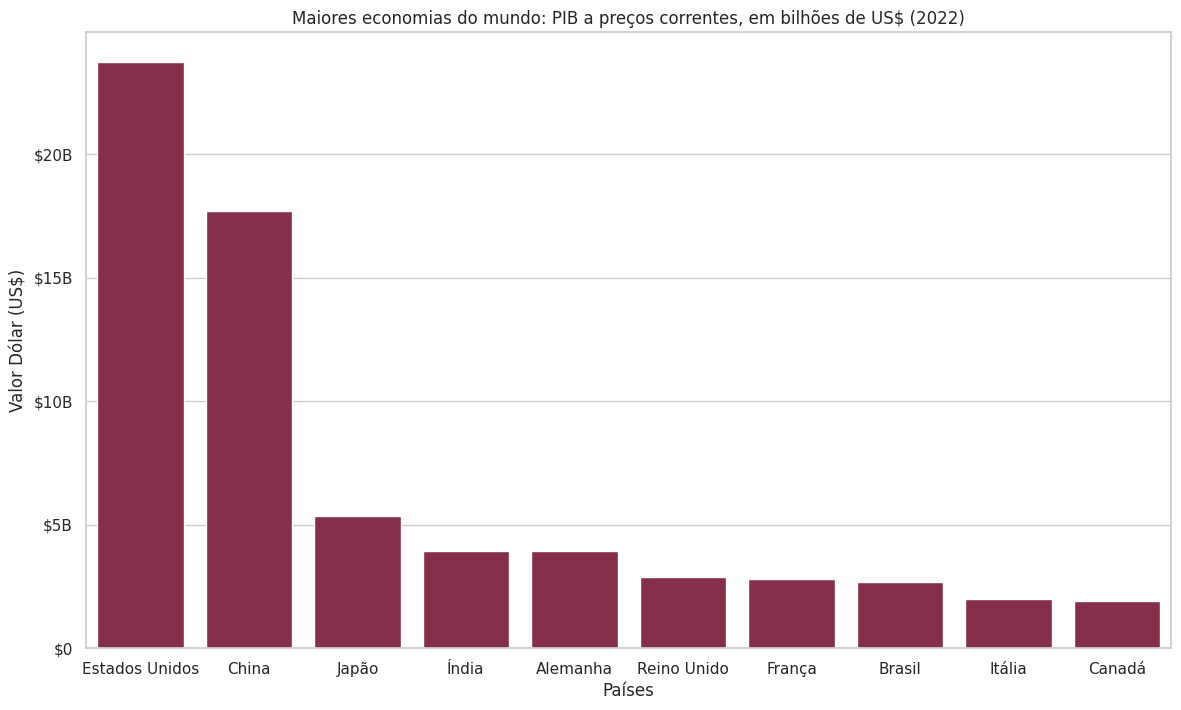

In [ ]:
plt.figure(figsize=(14,8))
cores_rgb_hex = ["#942145"]
axis = sns.barplot(x='pais', y='tota_por_ano', data=order_economia_mundo_2022_top, palette = cores_rgb_hex)

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e3:
        return f'${value / 1e3:.0f}B'
    elif value >= 1e2:
        return f'${value / 1e2:.0f}M'
    elif value >= 1e1:
        return f'${value / 1e1:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Países')
plt.ylabel('Valor Dólar (US$)')
plt.title('Maiores economias do mundo: PIB a preços correntes, em bilhões de US$ (2022)')

plt.show

##3.2 PIB Paridade do Poder de Compra (PPC)

In [ ]:
# Maiores economias do mundo: PIB Paridade do Poder de Compra (PPC), em bilhões de US$, 2012-2022
# https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_(Paridade_do_Poder_de_Compra)
pib_mundo = pd.read_csv("/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/economias_do_mundo/PIB_Poder_de_Compra_USD_2012-2022.csv" , sep=';', decimal=',')
pib_mundo.head(2)

,País,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,15235.77,16689.398,18228.356,19695.741,21291.766,23194.411,25176.320,27272.307,29463.872,31804.229,34316.492
1,Estados Unidos,16155.25,16691.500,17393.100,18036.650,18569.100,19417.144,20351.771,21239.303,22063.044,22886.238,23760.331


In [ ]:
#Ajuste do nome País para pais
pib_mundo.rename(columns={"País": "pais"}, inplace=True)

# Transformando a coluna 'pais' em índice (index)
pib_mundo.set_index('pais', inplace=True)

In [ ]:
pib_mundo_t = pib_mundo.T
pib_mundo_novo = pib_mundo_t.reset_index().melt(id_vars=["index"], value_vars=pib_mundo_t.columns)
pib_mundo_novo.columns = ["ano", "pais", "tota_por_ano"]
pib_mundo_novo.head(5)

,ano,pais,tota_por_ano
0,2012,China,15235.770
1,2013,China,16689.398
2,2014,China,18228.356
3,2015,China,19695.741
4,2016,China,21291.766


In [ ]:
# Filtrar pela linhas do ano de 2022

pib_mundo_2022 = pib_mundo_novo[pib_mundo_novo["ano"] == "2022"]
pib_mundo_2022_top = pib_mundo_2022.head(10)

In [ ]:
# criar um coluna de porcentagem do tota_por_ano
pib_mundo_2022_top['percentual_do_total'] = pib_mundo_2022_top['tota_por_ano'] / pib_mundo_2022_top['tota_por_ano'].sum() * 100

<ipython-input-88-e92c438529be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_mundo_2022_top['percentual_do_total'] = pib_mundo_2022_top['tota_por_ano'] / pib_mundo_2022_top['tota_por_ano'].sum() * 100


In [ ]:
pib_mundo_2022_top.head()

,ano,pais,tota_por_ano,percentual_do_total
10,2022,China,34316.492,32.710559
21,2022,Estados Unidos,23760.331,22.648402
32,2022,Índia,15426.544,14.704617
43,2022,Japão,6200.871,5.910685
54,2022,Alemanha,4902.402,4.672981


In [ ]:
order_pib_mundo_2022_top = pib_mundo_2022_top.sort_values('tota_por_ano', ascending=False)

<ipython-input-91-36fc80c6dc26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x='pais', y='tota_por_ano', data=order_pib_mundo_2022_top, palette = cores_rgb_hex)
<ipython-input-91-36fc80c6dc26>:5: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  axis = sns.barplot(x='pais', y='tota_por_ano', data=order_pib_mundo_2022_top, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

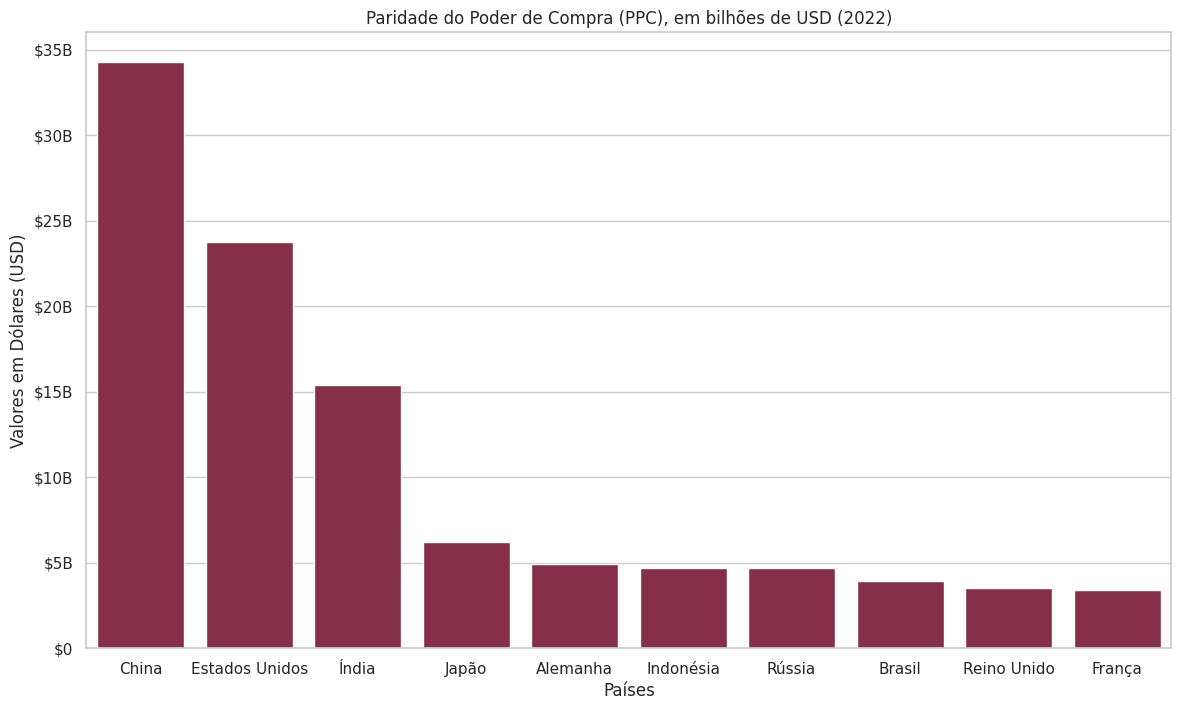

In [ ]:
plt.figure(figsize=(14,8))
cores_rgb_hex = ["#942145"]


axis = sns.barplot(x='pais', y='tota_por_ano', data=order_pib_mundo_2022_top, palette = cores_rgb_hex)

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e3:
        return f'${value / 1e3:.0f}B'
    elif value >= 1e2:
        return f'${value / 1e2:.0f}M'
    elif value >= 1e1:
        return f'${value / 1e1:.0f}K'
    else:
        return f'${value:.0f}'

# Aplicar o formatador à escala do eixo y
axis.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.xlabel('Países')
plt.ylabel('Valores em Dólares (USD)')
plt.title('Paridade do Poder de Compra (PPC), em bilhões de USD (2022)')

plt.show

## 3.3 PIB dos 10 Primeiros Países em 2023

<ipython-input-92-89e64c245dfe>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pais', y='Total', data=df_top10_numeric, palette=["#942145"])
<ipython-input-92-89e64c245dfe>:28: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Pais', y='Total', data=df_top10_numeric, palette=["#942145"])
<ipython-input-92-89e64c245dfe>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f} T'.format(y) for y in ax.get_yticks()])


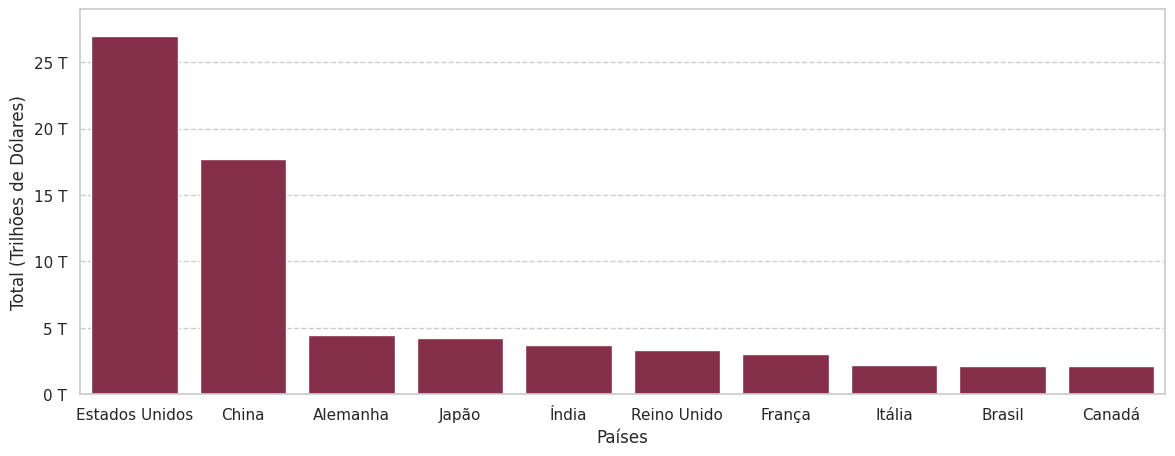

In [ ]:
# Configurar o locale para o formato brasileiro
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Dados
pib = {
    'Pais': ['Estados Unidos', 'China', 'Alemanha', 'Japão', 'Índia', 'Reino Unido', 'França', 'Itália', 'Brasil', 'Canadá',
             'Rússia', 'México', 'Coreia do Sul', 'Austrália', 'Espanha', 'Indonésia', 'Turquia', 'Holanda', 'Arábia Saudita', 'Suíça'],
    'Total': [26.95, 17.7, 4.43, 4.23, 3.73, 3.33, 3.05, 2.19, 2.13, 2.12, 1.86, 1.81, 1.71, 1.69, 1.58, 1.42, 1.15, 1.09, 1.07, 0.905]
}

# Criar o DataFrame
df_pib = pd.DataFrame(pib)

# Filtrar os 10 primeiros países
df_pib_top10 = df_pib.head(10)

# Criar uma cópia do DataFrame com 'Total' como valores numéricos
df_top10_numeric = df_pib_top10.copy()
df_top10_numeric['Total'] = df_top10_numeric['Total'].apply(lambda x: locale.atof(re.findall(r'\d+\.\d+', str(x))[0]))

# Adicionar uma coluna com o percentual do PIB em relação ao total
df_top10_numeric['Percentual do PIB (%)'] = (df_top10_numeric['Total'] / df_top10_numeric['Total'].sum()) * 100

# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 5))

# Criar o gráfico de barras usando o Seaborn
ax = sns.barplot(x='Pais', y='Total', data=df_top10_numeric, palette=["#942145"])

# Adicionar rótulos e título
plt.xlabel('Países')
plt.ylabel('Total (Trilhões de Dólares)')
# plt.title('PIB dos 10 Primeiros Países em 2023')
plt.ylim(0,29)
plt.grid(linestyle="--", axis='y')

# Adicionar unidade ao eixo y
ax.set_yticklabels(['{:.0f} T'.format(y) for y in ax.get_yticks()])

# Exibir o gráfico
plt.show()

In [ ]:
df_top10_numeric.head()

,Pais,Total,Percentual do PIB (%)
0,Estados Unidos,26.95,38.577154
1,China,17.70,25.336387
2,Alemanha,4.43,6.341254
3,Japão,4.23,6.054967
4,Índia,3.73,5.339250


# 4.Consulmo de vinho pelo mundo

## 4.1 Os 10 países que mais consomem vinho por litro

In [ ]:
# Maiores economias do mundo: PIB Paridade do Poder de Compra (PPC), em bilhões de US$, 2012-2022
consumo = pd.read_excel("/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/consumo/data_consumption_2022.xlsx")
consumo.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Population
0,Europe,Albania,Wine,Consumption,2022,1000 hl,315,2877797
1,America,Argentina,Wine,Consumption,2022,1000 hl,8276,45195774
2,Oceania,Australia,Wine,Consumption,2022,1000 hl,5337,25499884
3,Europe,Austria,Wine,Consumption,2022,1000 hl,2350,9006398
4,Asia,Azerbaijan,Wine,Consumption,2022,1000 hl,43,10139177


In [ ]:
consumo.rename(columns={'Region/Country':'Country'}, inplace=True)

In [ ]:
#consumo.drop(consumo.tail(2).index, inplace=True)

In [ ]:
order_consumo_pais_total= consumo.sort_values('Quantity', ascending=False)

In [ ]:
consumo_pais_total = order_consumo_pais_total[['Country', 'Quantity']].head(10)

In [ ]:
mapeamento_paises = {
    'United States of America': 'Estados Unidos',
    'France': 'França',
    'Italy': 'Itália',
    'Germany': 'Alemanha',
    'United Kingdom': 'Reino Unido',
    'Spain': 'Espanha',
    'China': 'China',
    'Russia': 'Rússia',
    'Argentina': 'Argentina',
    'Portugal': 'Portugal'
}

# Substituir os nomes dos países no DataFrame
consumo_pais_total['Country'] = consumo_pais_total['Country'].replace(mapeamento_paises)

<ipython-input-126-89d8b24e74e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Quantity', data=consumo_pais_total, palette = cores_rgb_hex)
<ipython-input-126-89d8b24e74e8>:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Country', y='Quantity', data=consumo_pais_total, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

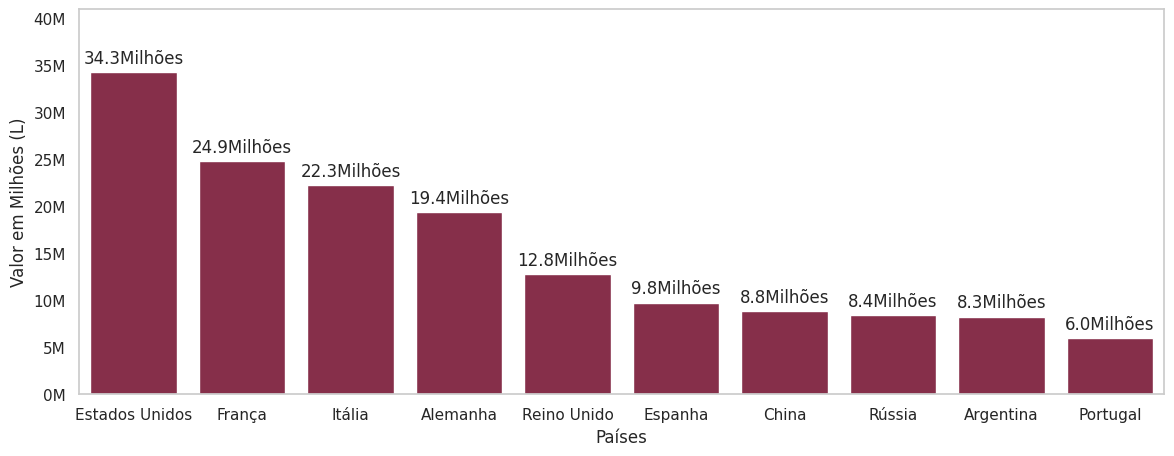

In [126]:
plt.figure(figsize=(14,5))
cores_rgb_hex = ["#942145"]
ax = sns.barplot(x='Country', y='Quantity', data=consumo_pais_total, palette = cores_rgb_hex)

plt.xlabel('Países')
plt.ylabel('Valor em Milhões (L)')
# plt.title('Os 10 países que mais consomem vinho por litro')
plt.grid(False)
plt.ylim(0,41000)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e3:.0f}M'))

# Adicionar números acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e3:.1f}Milhões',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show

In [ ]:
consumo_pais_total

,Country,Quantity
50,Estados Unidos,34344
17,França,24872
23,Itália,22300
19,Alemanha,19400
49,Reino Unido,12834
44,Espanha,9767
10,China,8815
39,Rússia,8394
1,Argentina,8276
36,Portugal,6022


## 4.2 Os 10 países que mais consomem vinho por litro dividido por continente

In [ ]:
consumo.head()

,Continent,Country,Product,Variable,Year,Unit,Quantity,Population
0,Europe,Albania,Wine,Consumption,2022,1000 hl,315,2877797
1,America,Argentina,Wine,Consumption,2022,1000 hl,8276,45195774
2,Oceania,Australia,Wine,Consumption,2022,1000 hl,5337,25499884
3,Europe,Austria,Wine,Consumption,2022,1000 hl,2350,9006398
4,Asia,Azerbaijan,Wine,Consumption,2022,1000 hl,43,10139177


In [ ]:
consumo_continente_total= consumo.sort_values('Quantity', ascending=False)

In [ ]:
consumo_continente_total = consumo[['Continent', 'Quantity']]

In [ ]:
consumo_continente_total.head(5)

,Continent,Quantity
0,Europe,315
1,America,8276
2,Oceania,5337
3,Europe,2350
4,Asia,43


In [ ]:
# Agrupar por continente e calcular a soma da quantidade
soma_por_continente = consumo_continente_total.groupby('Continent')['Quantity'].sum().reset_index()
orderm_soma_por_continente = soma_por_continente.sort_values('Quantity', ascending=False)

<ipython-input-107-c00d61389d6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Continent', y='Quantity', data=orderm_soma_por_continente, palette = cores_rgb_hex)
<ipython-input-107-c00d61389d6c>:3: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Continent', y='Quantity', data=orderm_soma_por_continente, palette = cores_rgb_hex)


<function matplotlib.pyplot.show(close=None, block=None)>

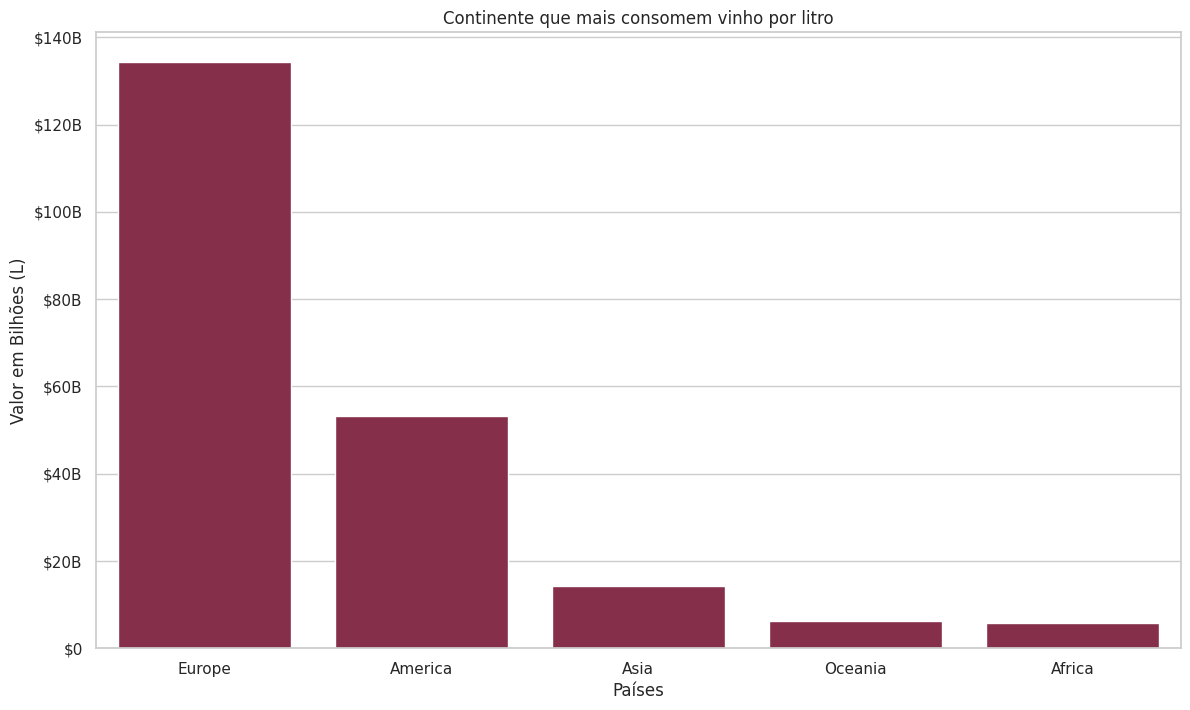

In [ ]:
plt.figure(figsize=(14,8))
cores_rgb_hex = ["#942145"]
ax = sns.barplot(x='Continent', y='Quantity', data=orderm_soma_por_continente, palette = cores_rgb_hex)

# Função para formatar os valores do eixo x em formato de dólar abreviado
def format_dollars(value, _):
    if value >= 1e3:
        return f'${value / 1e3:.0f}B'
    elif value >= 1e2:
        return f'${value / 1e2:.0f}M'
    elif value >= 1e1:
        return f'${value / 1e1:.0f}K'
    else:
        return f'${value:.0f}'

plt.xlabel('Países')
plt.ylabel('Valor em Bilhões (L)')
plt.title('Continente que mais consomem vinho por litro')

# Aplicar o formatador à escala do eixo y
ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))

# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e4:.0f}B'))

plt.show

## 4.3 Os 10 países que mais consomem vinho por litro dividido por pessoa

In [ ]:
consumo_por_pais_pessoa_total = pd.DataFrame(consumo)

# Calcular consumo per capita (em unidades de 1000 hl)
consumo_por_pais_pessoa_total['Consumo_Per_Capita'] = consumo_por_pais_pessoa_total['Quantity'] / consumo_por_pais_pessoa_total['Population']

# Mostrar o resultado
consumo_por_pais_pessoa_total[['Continent', 'Country', 'Consumo_Per_Capita']]

consumo_por_pais_pessoa_total.head()

,Continent,Country,Product,Variable,Year,Unit,Quantity,Population,Consumo_Per_Capita
0,Europe,Albania,Wine,Consumption,2022,1000 hl,315,2877797,0.000109
1,America,Argentina,Wine,Consumption,2022,1000 hl,8276,45195774,0.000183
2,Oceania,Australia,Wine,Consumption,2022,1000 hl,5337,25499884,0.000209
3,Europe,Austria,Wine,Consumption,2022,1000 hl,2350,9006398,0.000261
4,Asia,Azerbaijan,Wine,Consumption,2022,1000 hl,43,10139177,0.000004


In [ ]:
order_consumo_por_pais_pessoa = consumo_por_pais_pessoa_total.sort_values('Consumo_Per_Capita', ascending=False)

In [ ]:
order_consumo_por_pais_pessoa.head()

,Continent,Country,Product,Variable,Year,Unit,Quantity,Population,Consumo_Per_Capita
31,Africa,Morocco,Wine,Consumption,2022,1000 hl,391,597339,0.000655
36,Europe,Portugal,Wine,Consumption,2022,1000 hl,6022,10344802,0.000582
29,Europe,Luxemburg,Wine,Consumption,2022,1000 hl,255,625978,0.000407
17,Europe,France,Wine,Consumption,2022,1000 hl,24872,65273511,0.000381
23,Europe,Italy,Wine,Consumption,2022,1000 hl,22300,60461826,0.000369


<ipython-input-111-fcb035a0aca4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='País', y='Litros per Capita', data=df, palette=cores_rgb_hex)
<ipython-input-111-fcb035a0aca4>:15: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='País', y='Litros per Capita', data=df, palette=cores_rgb_hex)


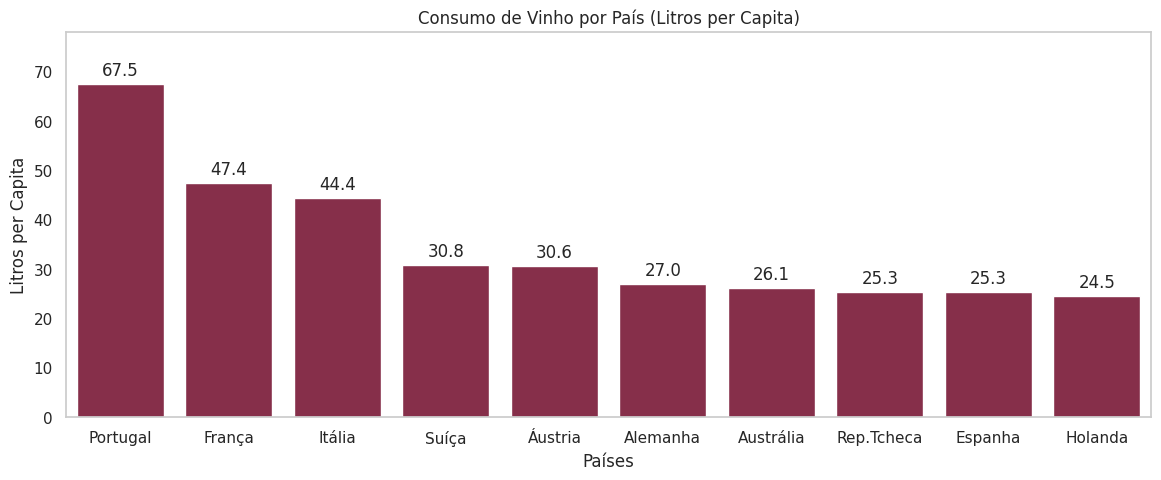

In [ ]:
# Dados
paises = ['Portugal', 'França', 'Itália', 'Suíça', 'Áustria', 'Alemanha', 'Austrália','Rep.Tcheca','Espanha', 'Holanda']
litros_per_capita = [67.5, 47.4, 44.4, 30.8, 30.6, 27, 26.1, 25.3, 25.3, 24.5]

# Criar DataFrame
dados = {'País': paises, 'Litros per Capita': litros_per_capita}
df = pd.DataFrame(dados)

# Configurar o estilo Seaborn
sns.set_theme(style="whitegrid")

# Criar gráfico de barras horizontal
plt.figure(figsize=(14, 5))
cores_rgb_hex = ["#942145"]
ax = sns.barplot(x='País', y='Litros per Capita', data=df, palette=cores_rgb_hex)
plt.xlabel('Países')
plt.ylabel('Litros per Capita')
plt.title('Consumo de Vinho por País (Litros per Capita)')
plt.ylim(0,78)
plt.grid(False)

# Adicionar números acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e0:.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Exibir o gráfico
plt.show()


 # 5.Produção

In [ ]:
producao.head(1)

,index,produto,1970 quantidade,1971 quantidade,1972 quantidade,1973 quantidade,1974 quantidade,1975 quantidade,1976 quantidade,1977 quantidade,...,2013 quantidade,2014 quantidade,2015 quantidade,2016 quantidade,2017 quantidade,2018 quantidade,2019 quantidade,2020 quantidade,2021 quantidade,2022 quantidade
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611


## 5.1 Tratamento de dados Produção

In [ ]:
#Produção retirar as duas primeras colunas
producao.drop(['index'], axis = 1, inplace = True)
# Transformando a coluna 'Produto' em índice (index)
producao.set_index('produto', inplace=True)

In [ ]:
# Selecionando colunas de 2007 a 2022
producao_filtro = producao.loc[:, '2007 quantidade':]
producao_filtro.head(2)

,2007 quantidade,2008 quantidade,2009 quantidade,2010 quantidade,2011 quantidade,2012 quantidade,2013 quantidade,2014 quantidade,2015 quantidade,2016 quantidade,2017 quantidade,2018 quantidade,2019 quantidade,2020 quantidade,2021 quantidade,2022 quantidade
produto,,,,,,,,,,,,,,,,
VINHO DE MESA,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
Tinto,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214


In [ ]:
# Filtro para pegar somente os Valores
producao_quantidade = producao_filtro.filter(like='quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in producao_quantidade.columns:
    if 'quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        producao_quantidade = producao_quantidade.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
producao_quantidade.head(2)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
produto,,,,,,,,,,,,,,,,
VINHO DE MESA,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
Tinto,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214


## 5.2 Produção de vinho de mesa

Selecionar linhas de vinho de mesa

In [ ]:
producao_vinho_mesa = producao_quantidade.iloc[1:4, :]
producao_vinho_mesa

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
produto,,,,,,,,,,,,,,,,
Tinto,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
Branco,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
Rosado,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968


inverter a linha para coluna

In [ ]:
# Inverter tabela a linha para coluna
producao_vinho_mesa_t = producao_vinho_mesa.T

# criar uma nova tabela com de 3 colunas
producao_mesa = producao_vinho_mesa_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_mesa_t.columns)
producao_mesa.columns = ["ano", "vinho_mesa", "quantidade"]
producao_mesa.head()

,ano,vinho_mesa,quantidade
0,2007,Tinto,228156220
1,2008,Tinto,241057928
2,2009,Tinto,164143454
3,2010,Tinto,157290088
4,2011,Tinto,210113358


### 5.2.1 Grafico de produção de vinho de mesa

<function matplotlib.pyplot.show(close=None, block=None)>

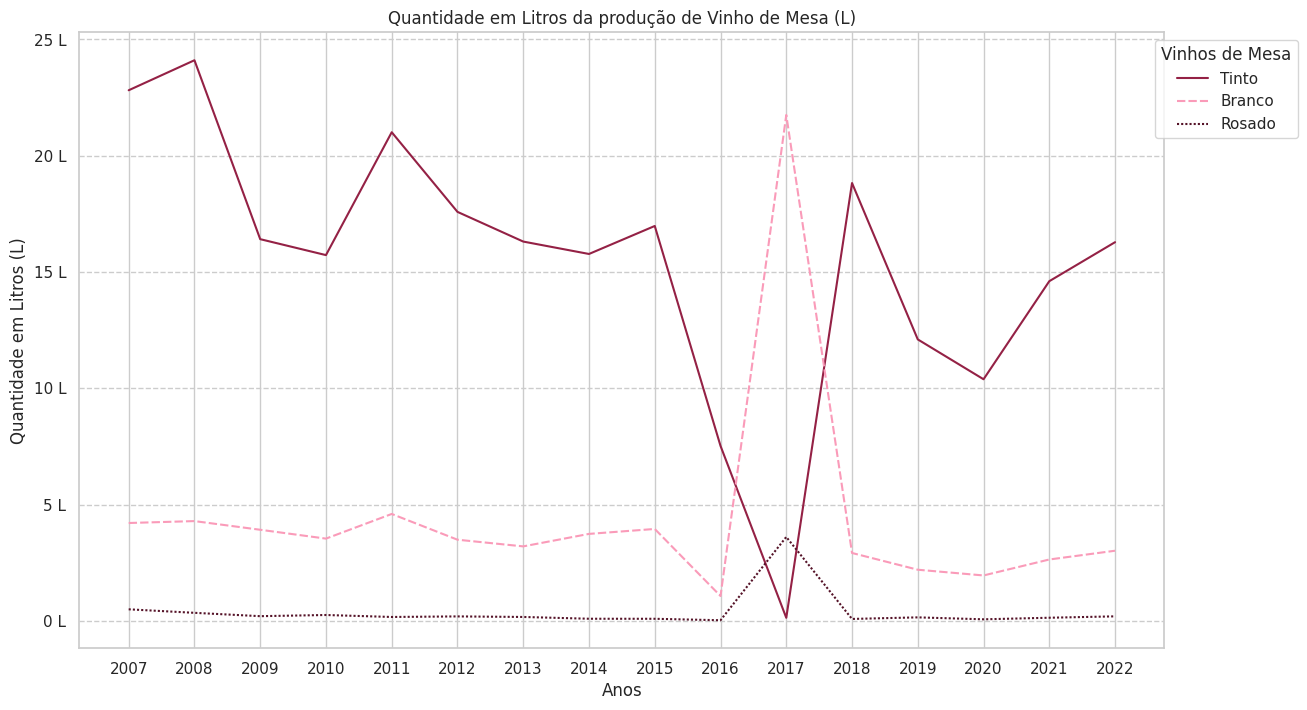

In [ ]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Paired")

cores_rgb_hex = ["#942145", "#FA9BB9", "#551328"]
# Seaborn lineplot
axis = sns.lineplot(data=producao_mesa, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa" ,  palette = cores_rgb_hex)
#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{valor/1000:.1f}'))

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1e7:.0f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))


plt.xlabel('Anos')
plt.ylabel('Quantidade em Litros (L)')
plt.title('Quantidade em Litros da produção de Vinho de Mesa (L)')
plt.grid(linestyle="--", axis = "y")

# Personalizar a legenda (nome apresentado para o hue)
legenda = plt.legend(title='Vinhos de Mesa', bbox_to_anchor=(1.13, 1))

plt.show

## 5.3 Produção de Vinho fino de mesa (VINÍFERA)

In [ ]:
producao_vinho_fino = producao_quantidade.iloc[5:8, :]
producao_vinho_fino

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
produto,,,,,,,,,,,,,,,,
Tinto,24786071,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
Branco,17598428,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
Rosado,791985,938898,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265


In [ ]:
producao_vinho_fino_t = producao_vinho_fino.T

producao_fino = producao_vinho_fino_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_fino_t.columns)
producao_fino.columns = ["ano", "vinho_mesa", "quantidade"]
producao_fino.head()

,ano,vinho_mesa,quantidade
0,2007,Tinto,24786071
1,2008,Tinto,27583032
2,2009,Tinto,18209043
3,2010,Tinto,11401406
4,2011,Tinto,24104740


### 5.3.1 Grafico de produção de Vinhos finos de Mesa

<function matplotlib.pyplot.show(close=None, block=None)>

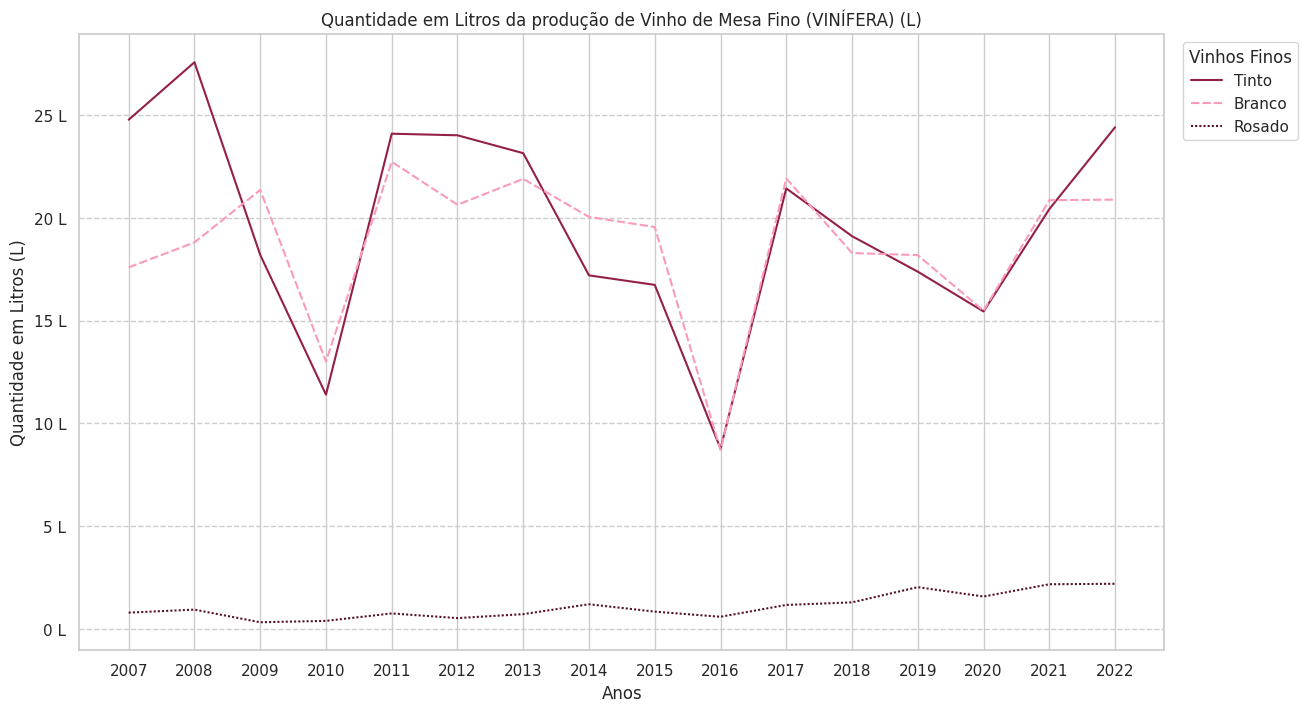

In [ ]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Set2")
cores_rgb_hex = ["#942145", "#FA9BB9", "#551328"]
axis = sns.lineplot(data=producao_fino, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa", palette=cores_rgb_hex)# palette = palettes)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1e6:.0f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))

plt.xlabel('Anos')
plt.ylabel('Quantidade em Litros (L)')
plt.title('Quantidade em Litros da produção de Vinho de Mesa Fino (VINÍFERA) (L)')
plt.grid(linestyle="--", axis = "y")

# Personalizar a legenda (nome apresentado para o hue)
legenda = plt.legend(title='Vinhos Finos',bbox_to_anchor=(1.01, 1))

plt.show